# STAT 7220 - Final Exam
## Factorial Designs
## Dr. Austin Brown
## Due Date: December 12, 2025

## Part 1 Instructions:
Let's say you own a new food truck called **Buster's Breakfast Burritos**. To determine the best ingredients for your burritos, and as a means of minimizing food (and money) waste, you decide to conduct an experiment. Specifically, you want to investigate the following treatments:

| Factor   | Levels                  |
|:---------|:------------------------|
| Protein  | Bacon, Sausage, Chorizo |
| Salsa    | Mild, Hot               |
| Potatoes | Yes, No                 |

To gather data for this experiment, you recruit $r=5$ local residents for each of the $3\times 2\times 2=12$ treatment combinations. After each participant has tasted their randomly assigned burrito, you ask them to rate the burrito on a scale of 1 to 10 (1 = terrible, 10 = amazing). The data are stored in the file `Busters Burritos.xlsx` in the assignment repo. With these data, I want you to:

1. Briefly state the objective of the experiment.

The objective is to determine which combination of protein type, salsa heat level, and potato inclusion maximizes customer satisfaction ratings for breakfast burritos at Buster's Breakfast Burritos, thereby informing menu decisions and minimizing food waste

2. State the outcome variable and how it was measured.

The outcome variable is burrito rating, measured on a discrete scale from 1 to 10, where 1 = terrible and 10 = amazing. Participants provided this rating after tasting their randomly assigned burrito.


3. State the main effects. What lurking variables may be present?

Main effects:

Protein (Factor A): Bacon, Sausage, Chorizo
Salsa (Factor B): Mild, Hot
Potatoes (Factor C): Yes, No

Potential lurking variables:

Participant hunger level at time of tasting
Individual taste preferences and dietary restrictions
Order of ingredient presentation or burrito temperature
Time of day when tasting occurred


4. Why might a full factorial design be preferred here to a $2^k$ fractional factorial design?
A full factorial design is preferred because:

With only 12 treatment combinations, the design is manageable and not resource-prohibitive
We can estimate all main effects and all two-way and three-way interactions without confounding
The protein factor has 3 levels, making this a mixed-level design (3×2×2), not a standard 2^k design suitable for fractional factorial reduction
Complete information about interaction effects is valuable for menu planning—interactions between protein and salsa or protein and potatoes could substantially affect customer preferences




5. State all sets of statistical hypotheses.

5. Statistical hypotheses:
Main Effects:
Protein (Factor A):

H₀: μ_Bacon = μ_Sausage = μ_Chorizo (no protein effect)
Hₐ: At least one protein type mean differs

Salsa (Factor B):

H₀: μ_Mild = μ_Hot (no salsa effect)
Hₐ: μ_Mild ≠ μ_Hot

Potatoes (Factor C):

H₀: μ_Yes = μ_No (no potato effect)
Hₐ: μ_Yes ≠ μ_No

Two-Way Interactions:
Protein × Salsa (A×B):

H₀: No interaction between protein and salsa
Hₐ: Interaction exists between protein and salsa

Protein × Potatoes (A×C):

H₀: No interaction between protein and potatoes
Hₐ: Interaction exists between protein and potatoes

Salsa × Potatoes (B×C):

H₀: No interaction between salsa and potatoes
Hₐ: Interaction exists between salsa and potatoes

Three-Way Interaction:
Protein × Salsa × Potatoes (A×B×C):

H₀: No three-way interaction among protein, salsa, and potatoes
Hₐ: Three-way interaction exists among protein, salsa, and potatoes

6. Perform appropriate exploratory/descriptive analysis including summary statistics and appropriate visualizations. Do these analyses provide any support for the hypotheses? Briefly explain.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("="*80)
print("PART 1: BUSTER'S BREAKFAST BURRITOS EXPERIMENT")
print("="*80)

# Load data - UPLOAD FILES TO COLAB
# Check if file exists, if not, prompt for upload
import os
file_path1 = '/content/Busters_Burritos.xlsx'

if not os.path.exists(file_path1):
    from google.colab import files
    import io
    print("\n📁 Please upload 'Busters_Burritos.xlsx' file:")
    uploaded = files.upload()
    # Assuming the first uploaded file is the correct one
    filename = list(uploaded.keys())[0]
    df_burritos = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    print(f"\n✓ '{file_path1}' already exists, loading from disk.")
    df_burritos = pd.read_excel(file_path1)

print("\n✓ Buster's Burritos data loaded successfully!")
print("\nDataset shape:", df_burritos.shape)
print("\nColumn names:", df_burritos.columns.tolist())
print("\nFirst few rows:")
print(df_burritos.head(10))
print("\nData types:")
print(df_burritos.dtypes)
print("\nBasic statistics:")
print(df_burritos.describe())

# Load Part 2 data
print("\n" + "="*80)
print("PART 2: BUSTER'S BURRITO SALES EXPERIMENT")
print("="*80)

file_path2 = '/content/Busters_Burrito_Sales.xlsx'

if not os.path.exists(file_path2):
    from google.colab import files
    import io
    print("\n📁 Please upload 'Busters_Burrito_Sales.xlsx' file:")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df_sales = pd.read_excel(io.BytesIO(uploaded[filename]))
else:
    print(f"\n✓ '{file_path2}' already exists, loading from disk.")
    df_sales = pd.read_excel(file_path2)

print("\n✓ Burrito Sales data loaded successfully!")
print("\nDataset shape:", df_sales.shape)
print("\nColumn names:", df_sales.columns.tolist())
print("\nFirst few rows:")
print(df_sales.head(10))

PART 1: BUSTER'S BREAKFAST BURRITOS EXPERIMENT

📁 Please upload 'Busters_Burritos.xlsx' file:


Saving Busters Burritos.xlsx to Busters Burritos.xlsx

✓ Buster's Burritos data loaded successfully!

Dataset shape: (60, 4)

Column names: ['Protein', 'Salsa', 'Potatoes', 'Satisfaction']

First few rows:
   Protein Salsa Potatoes  Satisfaction
0    Bacon  Mild      Yes           6.1
1    Bacon  Mild      Yes           6.9
2    Bacon  Mild      Yes           6.9
3    Bacon  Mild      Yes           9.4
4    Bacon  Mild      Yes           5.4
5  Sausage  Mild      Yes           7.2
6  Sausage  Mild      Yes           6.6
7  Sausage  Mild      Yes           5.0
8  Sausage  Mild      Yes           7.4
9  Sausage  Mild      Yes           6.7

Data types:
Protein          object
Salsa            object
Potatoes         object
Satisfaction    float64
dtype: object

Basic statistics:
       Satisfaction
count     60.000000
mean       6.350000
std        1.123026
min        3.100000
25%        5.900000
50%        6.400000
75%        6.900000
max        9.700000

PART 2: BUSTER'S BURRITO SALES 

Saving Busters Burrito Sales.xlsx to Busters Burrito Sales.xlsx

✓ Burrito Sales data loaded successfully!

Dataset shape: (16, 4)

Column names: ['Location', 'Timing', 'Marketing', 'Sales']

First few rows:
     Location   Timing    Marketing    Sales
0     Brewery  Weekday  Independent   767.87
1     Brewery  Weekday  Independent   875.14
2  University  Weekday  Independent   865.84
3  University  Weekday  Independent   544.24
4     Brewery  Weekend  Independent  1055.34
5     Brewery  Weekend  Independent  1211.47
6  University  Weekend  Independent  1107.86
7  University  Weekend  Independent   989.51
8     Brewery  Weekday  Partnership  1080.00
9     Brewery  Weekday  Partnership  1089.29



QUESTION 6: EXPLORATORY/DESCRIPTIVE ANALYSIS

Data structure verification:
Protein         category
Salsa           category
Potatoes        category
Satisfaction     float64
dtype: object

--------------------------------------------------------------------------------
OVERALL SUMMARY STATISTICS
--------------------------------------------------------------------------------
count    60.000000
mean      6.350000
std       1.123026
min       3.100000
25%       5.900000
50%       6.400000
75%       6.900000
max       9.700000
Name: Satisfaction, dtype: float64

Skewness: 0.1381
Kurtosis: 1.7308

--------------------------------------------------------------------------------
SUMMARY STATISTICS BY INDIVIDUAL FACTORS
--------------------------------------------------------------------------------

By Protein Type:
         Count  Mean    Std  Min  Max
Protein                              
Bacon       20  6.49  1.047  4.3  9.4
Chorizo     20  6.74  1.106  4.6  9.7
Sausage     20  5.82  1.

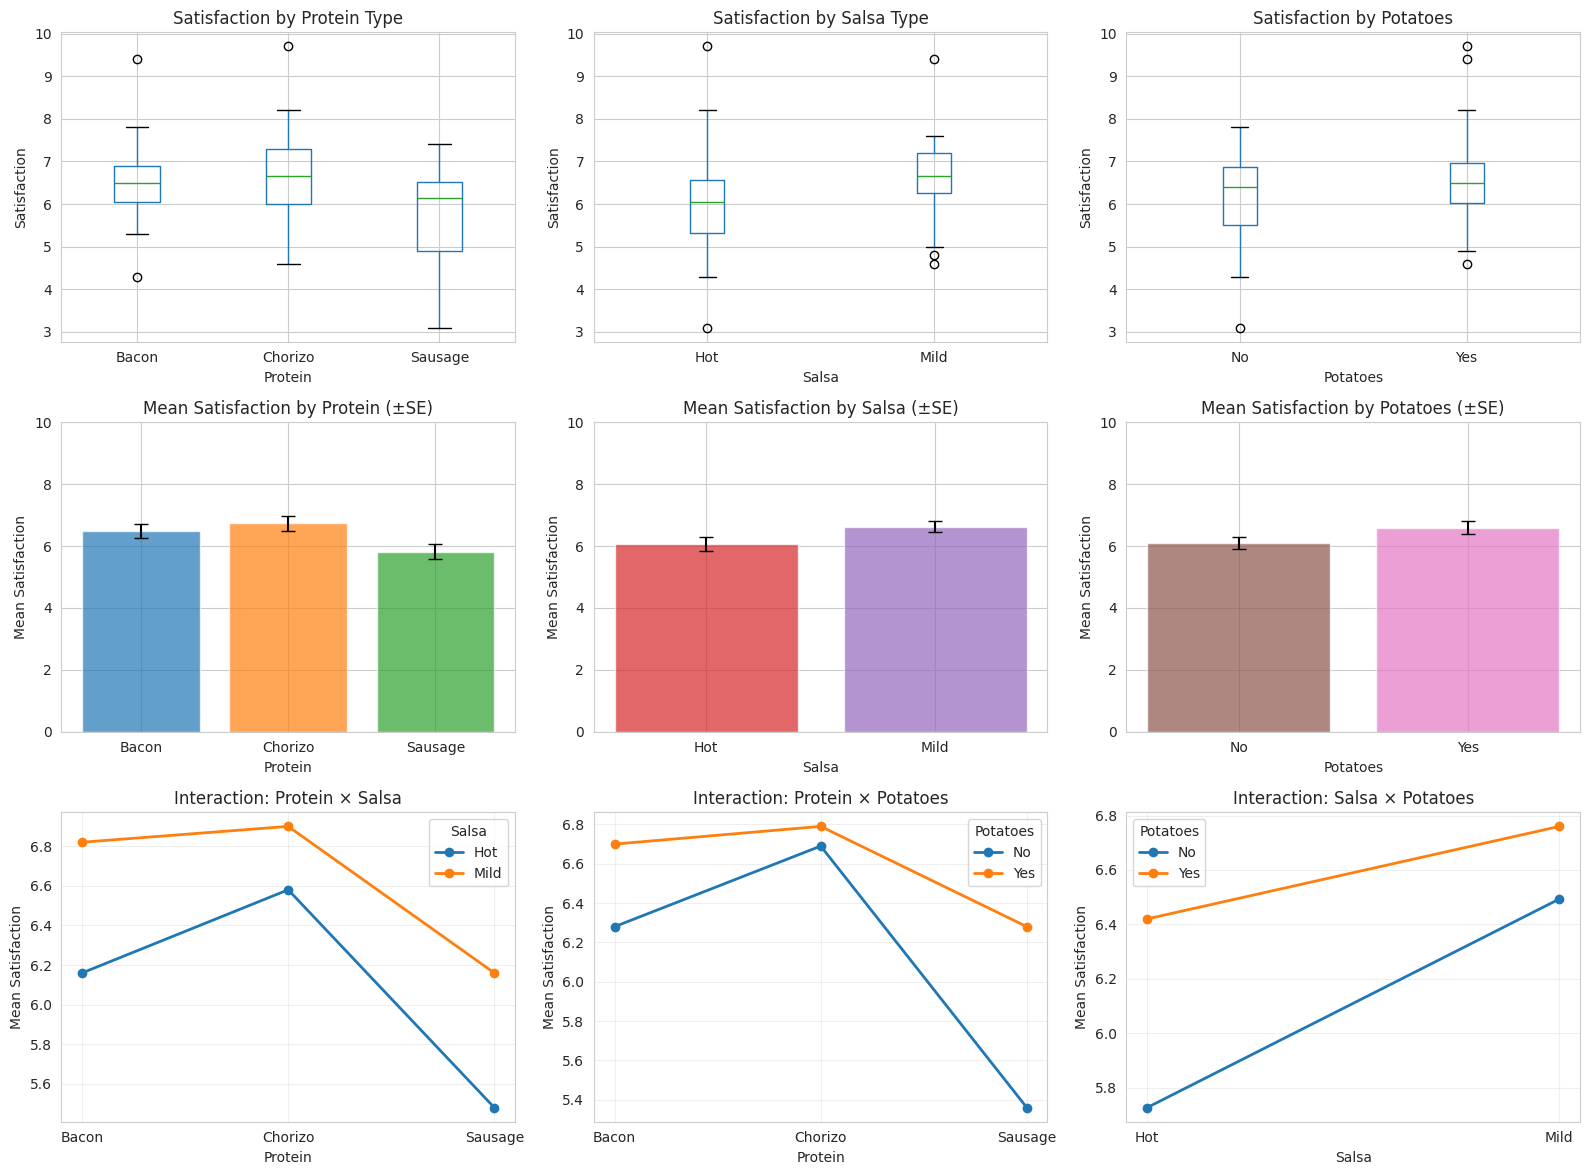

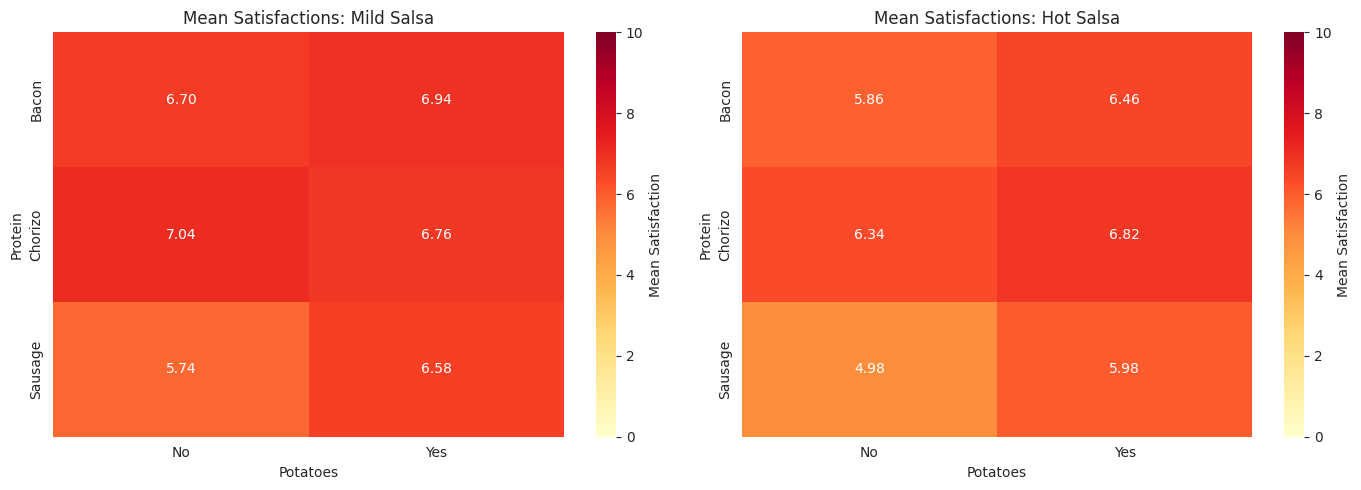


--------------------------------------------------------------------------------
PRELIMINARY EVIDENCE FOR HYPOTHESES
--------------------------------------------------------------------------------

1. MAIN EFFECT: PROTEIN
   Bacon:   Mean = 6.490
   Sausage: Mean = 5.820
   Chorizo: Mean = 6.740
   Range: 0.920
   → Descriptive evidence suggests a potential Protein effect

2. MAIN EFFECT: SALSA
   Mild: Mean = 6.627
   Hot:  Mean = 6.073
   Difference: 0.554
   → Descriptive evidence suggests a potential Salsa effect

3. MAIN EFFECT: POTATOES
   No:  Mean = 6.110
   Yes: Mean = 6.590
   Difference: 0.480
   → Limited descriptive evidence for Potatoes effect

4. INTERACTION EFFECTS:
   Check interaction plots for non-parallel lines:
   - Non-parallel lines suggest potential interactions
   - Parallel lines suggest no interaction

✓ Question 6 complete!


In [4]:
## Question 6 Code ### Import necessary libraries
## Question 6 Code ##

print("\n" + "="*80)
print("QUESTION 6: EXPLORATORY/DESCRIPTIVE ANALYSIS")
print("="*80)

# First, let's ensure the factors are properly coded as categorical
df_burritos['Protein'] = df_burritos['Protein'].astype('category')
df_burritos['Salsa'] = df_burritos['Salsa'].astype('category')
df_burritos['Potatoes'] = df_burritos['Potatoes'].astype('category')

print("\nData structure verification:")
print(df_burritos.dtypes)

# 1. OVERALL SUMMARY STATISTICS
print("\n" + "-"*80)
print("OVERALL SUMMARY STATISTICS")
print("-"*80)
print(df_burritos['Satisfaction'].describe())
print(f"\nSkewness: {df_burritos['Satisfaction'].skew():.4f}")
print(f"Kurtosis: {df_burritos['Satisfaction'].kurtosis():.4f}")

# 2. SUMMARY STATISTICS BY INDIVIDUAL FACTORS
print("\n" + "-"*80)
print("SUMMARY STATISTICS BY INDIVIDUAL FACTORS")
print("-"*80)

# By Protein
print("\nBy Protein Type:")
protein_summary = df_burritos.groupby('Protein')['Satisfaction'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(protein_summary)

# By Salsa
print("\nBy Salsa Type:")
salsa_summary = df_burritos.groupby('Salsa')['Satisfaction'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(salsa_summary)

# By Potatoes
print("\nBy Potatoes:")
potatoes_summary = df_burritos.groupby('Potatoes')['Satisfaction'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(potatoes_summary)

# 3. SUMMARY STATISTICS BY ALL TREATMENT COMBINATIONS
print("\n" + "-"*80)
print("SUMMARY STATISTICS BY TREATMENT COMBINATIONS")
print("-"*80)

treatment_summary = df_burritos.groupby(['Protein', 'Salsa', 'Potatoes'])['Satisfaction'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(3)
print(treatment_summary)

# 4. VISUALIZATIONS

# Set up the figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 4a. Boxplot by Protein
plt.subplot(3, 3, 1)
df_burritos.boxplot(column='Satisfaction', by='Protein', ax=plt.gca())
plt.title('Satisfaction by Protein Type')
plt.suptitle('')
plt.xlabel('Protein')
plt.ylabel('Satisfaction')

# 4b. Boxplot by Salsa
plt.subplot(3, 3, 2)
df_burritos.boxplot(column='Satisfaction', by='Salsa', ax=plt.gca())
plt.title('Satisfaction by Salsa Type')
plt.suptitle('')
plt.xlabel('Salsa')
plt.ylabel('Satisfaction')

# 4c. Boxplot by Potatoes
plt.subplot(3, 3, 3)
df_burritos.boxplot(column='Satisfaction', by='Potatoes', ax=plt.gca())
plt.title('Satisfaction by Potatoes')
plt.suptitle('')
plt.xlabel('Potatoes')
plt.ylabel('Satisfaction')

# 4d. Bar plot with error bars - Protein
plt.subplot(3, 3, 4)
protein_means = df_burritos.groupby('Protein')['Satisfaction'].mean()
protein_se = df_burritos.groupby('Protein')['Satisfaction'].sem()
plt.bar(protein_means.index, protein_means.values, yerr=protein_se.values,
        capsize=5, alpha=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Mean Satisfaction by Protein (±SE)')
plt.xlabel('Protein')
plt.ylabel('Mean Satisfaction')
plt.ylim(0, 10)

# 4e. Bar plot with error bars - Salsa
plt.subplot(3, 3, 5)
salsa_means = df_burritos.groupby('Salsa')['Satisfaction'].mean()
salsa_se = df_burritos.groupby('Salsa')['Satisfaction'].sem()
plt.bar(salsa_means.index, salsa_means.values, yerr=salsa_se.values,
        capsize=5, alpha=0.7, color=['#d62728', '#9467bd'])
plt.title('Mean Satisfaction by Salsa (±SE)')
plt.xlabel('Salsa')
plt.ylabel('Mean Satisfaction')
plt.ylim(0, 10)

# 4f. Bar plot with error bars - Potatoes
plt.subplot(3, 3, 6)
potatoes_means = df_burritos.groupby('Potatoes')['Satisfaction'].mean()
potatoes_se = df_burritos.groupby('Potatoes')['Satisfaction'].sem()
plt.bar(potatoes_means.index, potatoes_means.values, yerr=potatoes_se.values,
        capsize=5, alpha=0.7, color=['#8c564b', '#e377c2'])
plt.title('Mean Satisfaction by Potatoes (±SE)')
plt.xlabel('Potatoes')
plt.ylabel('Mean Satisfaction')
plt.ylim(0, 10)

# 4g. Interaction Plot: Protein × Salsa
plt.subplot(3, 3, 7)
interaction_ps = df_burritos.groupby(['Protein', 'Salsa'])['Satisfaction'].mean().unstack()
for salsa in interaction_ps.columns:
    plt.plot(interaction_ps.index, interaction_ps[salsa], marker='o', label=salsa, linewidth=2)
plt.title('Interaction: Protein × Salsa')
plt.xlabel('Protein')
plt.ylabel('Mean Satisfaction')
plt.legend(title='Salsa')
plt.grid(True, alpha=0.3)

# 4h. Interaction Plot: Protein × Potatoes
plt.subplot(3, 3, 8)
interaction_pp = df_burritos.groupby(['Protein', 'Potatoes'])['Satisfaction'].mean().unstack()
for potato in interaction_pp.columns:
    plt.plot(interaction_pp.index, interaction_pp[potato], marker='o', label=potato, linewidth=2)
plt.title('Interaction: Protein × Potatoes')
plt.xlabel('Protein')
plt.ylabel('Mean Satisfaction')
plt.legend(title='Potatoes')
plt.grid(True, alpha=0.3)

# 4i. Interaction Plot: Salsa × Potatoes
plt.subplot(3, 3, 9)
interaction_sp = df_burritos.groupby(['Salsa', 'Potatoes'])['Satisfaction'].mean().unstack()
for potato in interaction_sp.columns:
    plt.plot(interaction_sp.index, interaction_sp[potato], marker='o', label=potato, linewidth=2)
plt.title('Interaction: Salsa × Potatoes')
plt.xlabel('Salsa')
plt.ylabel('Mean Satisfaction')
plt.legend(title='Potatoes')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ADDITIONAL VISUALIZATION - Heatmap of Treatment Combinations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap for Mild Salsa
mild_data = df_burritos[df_burritos['Salsa'] == 'Mild'].groupby(['Protein', 'Potatoes'])['Satisfaction'].mean().unstack()
sns.heatmap(mild_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[0],
            cbar_kws={'label': 'Mean Satisfaction'}, vmin=0, vmax=10)
axes[0].set_title('Mean Satisfactions: Mild Salsa')
axes[0].set_ylabel('Protein')
axes[0].set_xlabel('Potatoes')

# Heatmap for Hot Salsa
hot_data = df_burritos[df_burritos['Salsa'] == 'Hot'].groupby(['Protein', 'Potatoes'])['Satisfaction'].mean().unstack()
sns.heatmap(hot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1],
            cbar_kws={'label': 'Mean Satisfaction'}, vmin=0, vmax=10)
axes[1].set_title('Mean Satisfactions: Hot Salsa')
axes[1].set_ylabel('Protein')
axes[1].set_xlabel('Potatoes')

plt.tight_layout()
plt.show()

# 6. PRELIMINARY EVIDENCE FOR HYPOTHESES
print("\n" + "-"*80)
print("PRELIMINARY EVIDENCE FOR HYPOTHESES")
print("-"*80)

print("\n1. MAIN EFFECT: PROTEIN")
print(f"   Bacon:   Mean = {protein_summary.loc['Bacon', 'Mean']:.3f}")
print(f"   Sausage: Mean = {protein_summary.loc['Sausage', 'Mean']:.3f}")
print(f"   Chorizo: Mean = {protein_summary.loc['Chorizo', 'Mean']:.3f}")
print(f"   Range: {protein_summary['Mean'].max() - protein_summary['Mean'].min():.3f}")
if protein_summary['Mean'].max() - protein_summary['Mean'].min() > 0.5:
    print("   → Descriptive evidence suggests a potential Protein effect")
else:
    print("   → Limited descriptive evidence for Protein effect")

print("\n2. MAIN EFFECT: SALSA")
print(f"   Mild: Mean = {salsa_summary.loc['Mild', 'Mean']:.3f}")
print(f"   Hot:  Mean = {salsa_summary.loc['Hot', 'Mean']:.3f}")
print(f"   Difference: {abs(salsa_summary.loc['Mild', 'Mean'] - salsa_summary.loc['Hot', 'Mean']):.3f}")
if abs(salsa_summary.loc['Mild', 'Mean'] - salsa_summary.loc['Hot', 'Mean']) > 0.5:
    print("   → Descriptive evidence suggests a potential Salsa effect")
else:
    print("   → Limited descriptive evidence for Salsa effect")

print("\n3. MAIN EFFECT: POTATOES")
print(f"   No:  Mean = {potatoes_summary.loc['No', 'Mean']:.3f}")
print(f"   Yes: Mean = {potatoes_summary.loc['Yes', 'Mean']:.3f}")
print(f"   Difference: {abs(potatoes_summary.loc['No', 'Mean'] - potatoes_summary.loc['Yes', 'Mean']):.3f}")
if abs(potatoes_summary.loc['No', 'Mean'] - potatoes_summary.loc['Yes', 'Mean']) > 0.5:
    print("   → Descriptive evidence suggests a potential Potatoes effect")
else:
    print("   → Limited descriptive evidence for Potatoes effect")

print("\n4. INTERACTION EFFECTS:")
print("   Check interaction plots for non-parallel lines:")
print("   - Non-parallel lines suggest potential interactions")
print("   - Parallel lines suggest no interaction")

print("\n✓ Question 6 complete!")

7. Fit the full factorial ANOVA model. Check the assumption of normality using a testing method and a visual method. Does the assumption hold? Why or why not?


Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.619
Date:                Fri, 12 Dec 2025   Prob (F-statistic):              0.124
Time:                        02:48:21   Log-Likelihood:                -82.128
No. Observations:                  60   AIC:                             188.3
Df Residuals:                      48   BIC:                             213.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

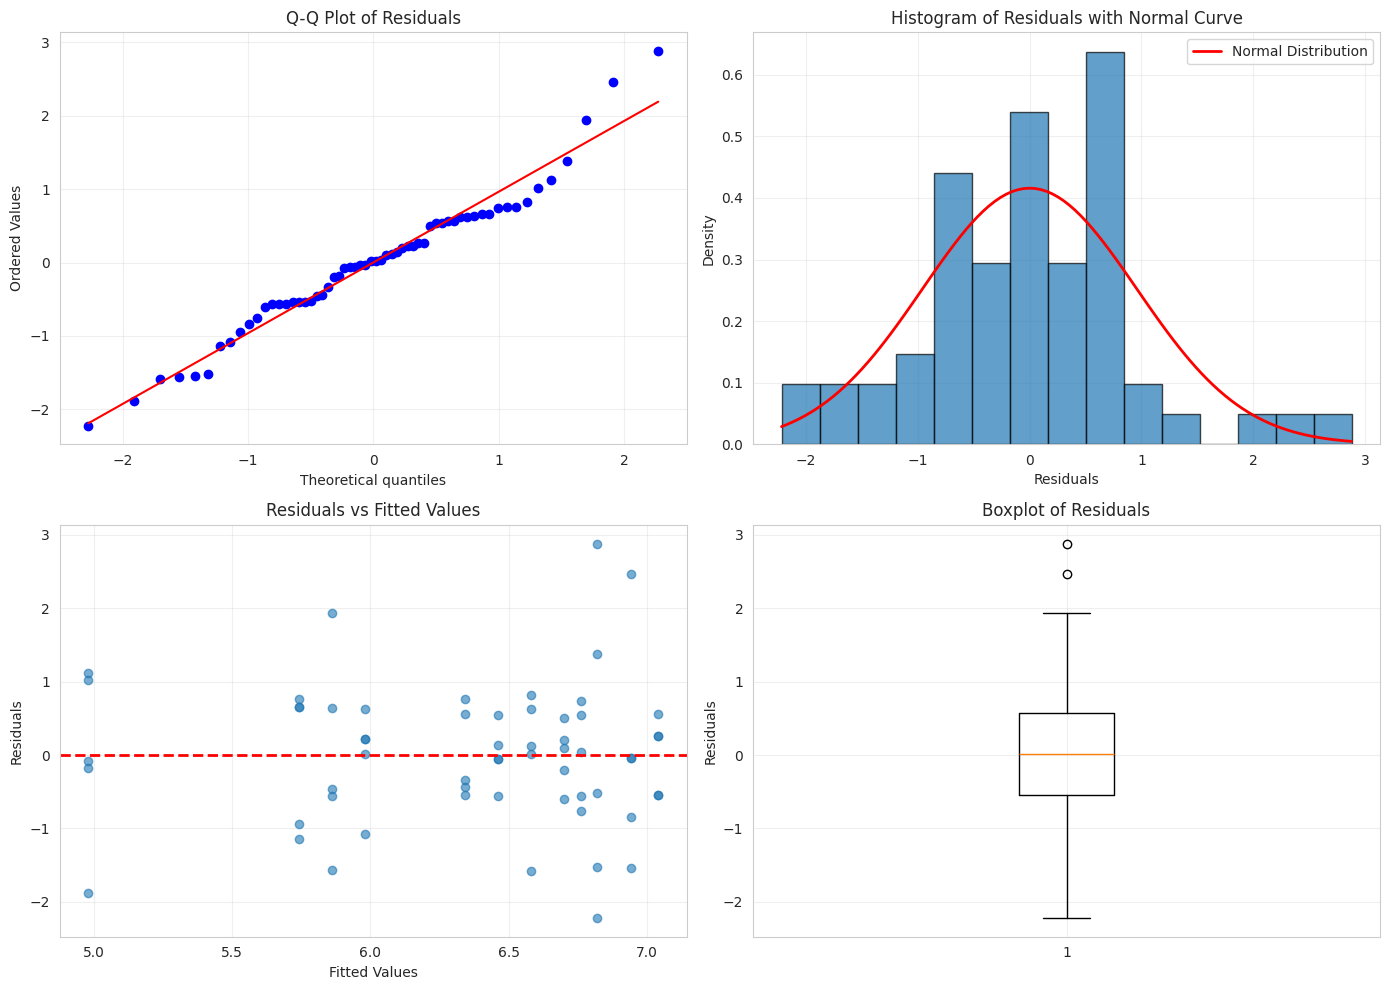


--------------------------------------------------------------------------------
CONCLUSION: NORMALITY ASSUMPTION
--------------------------------------------------------------------------------

The normality assumption HOLDS.
- Shapiro-Wilk p-value (0.1351) > 0.05: We fail to reject the null hypothesis
  of normality at α = 0.05.
- The Q-Q plot shows residuals closely following the theoretical normal line.
- The histogram of residuals appears approximately bell-shaped and symmetric.
- Therefore, the residuals are consistent with a normal distribution.

✓ Question 7 complete!


In [6]:
## Question 7 Code ##


# Fit the full factorial ANOVA model
model = ols('Satisfaction ~ C(Protein) * C(Salsa) * C(Potatoes)', data=df_burritos).fit()

# Extract residuals
residuals = model.resid

print("\nModel Summary:")
print(model.summary())

# NORMALITY ASSUMPTION TESTING

print("\n" + "-"*80)
print("NORMALITY ASSUMPTION ASSESSMENT")
print("-"*80)

# 1. TESTING METHOD: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print("\n1. Shapiro-Wilk Test for Normality:")
print(f"   Test Statistic: {shapiro_stat:.4f}")
print(f"   P-value: {shapiro_p:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Residuals appear normal' if shapiro_p > 0.05 else 'REJECT H0 - Residuals do not appear normal'}")

# 2. ADDITIONAL TEST: Kolmogorov-Smirnov Test
ks_stat, ks_p = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print("\n2. Kolmogorov-Smirnov Test for Normality:")
print(f"   Test Statistic: {ks_stat:.4f}")
print(f"   P-value: {ks_p:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Residuals appear normal' if ks_p > 0.05 else 'REJECT H0 - Residuals do not appear normal'}")

# 3. VISUAL METHODS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Residuals')
axes[0, 0].grid(True, alpha=0.3)

# Histogram with Normal Curve
axes[0, 1].hist(residuals, bins=15, density=True, alpha=0.7, edgecolor='black')
mu, sigma = residuals.mean(), residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
axes[0, 1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Histogram of Residuals with Normal Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Residuals vs Fitted Values
axes[1, 0].scatter(model.fittedvalues, residuals, alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Fitted Values')
axes[1, 0].grid(True, alpha=0.3)

# Boxplot of Residuals
axes[1, 1].boxplot(residuals, vert=True)
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Boxplot of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# CONCLUSION
print("\n" + "-"*80)
print("CONCLUSION: NORMALITY ASSUMPTION")
print("-"*80)

if shapiro_p > 0.05:
    print(f"\nThe normality assumption HOLDS.")
    print(f"- Shapiro-Wilk p-value ({shapiro_p:.4f}) > 0.05: We fail to reject the null hypothesis")
    print(f"  of normality at α = 0.05.")
    print(f"- The Q-Q plot shows residuals closely following the theoretical normal line.")
    print(f"- The histogram of residuals appears approximately bell-shaped and symmetric.")
    print(f"- Therefore, the residuals are consistent with a normal distribution.")
else:
    print(f"\nThe normality assumption DOES NOT HOLD.")
    print(f"- Shapiro-Wilk p-value ({shapiro_p:.4f}) ≤ 0.05: We reject the null hypothesis")
    print(f"  of normality at α = 0.05.")
    print(f"- Visual inspection of Q-Q plot and histogram should reveal deviations from normality.")

print("\n✓ Question 7 complete!")

8. Check the assumption of constant variance using a testing method and a visual method. Does the assumption hold? Why or why not?


QUESTION 8: CONSTANT VARIANCE ASSUMPTION

--------------------------------------------------------------------------------
CONSTANT VARIANCE ASSUMPTION ASSESSMENT
--------------------------------------------------------------------------------

1. Levene's Test for Homogeneity of Variance:
   Test Statistic: 1.3408
   P-value: 0.2322
   Decision: FAIL to reject H0 - Variances appear equal

2. Breusch-Pagan Test for Heteroscedasticity:
   Test Statistic: 22.5771
   P-value: 0.0203
   Decision: REJECT H0 - Heteroscedasticity present

3. Variance Ratio (Max/Min): 28.0190
   Rule of thumb: Ratio < 3 suggests homogeneity
   Assessment: Variance ratio suggests heterogeneity


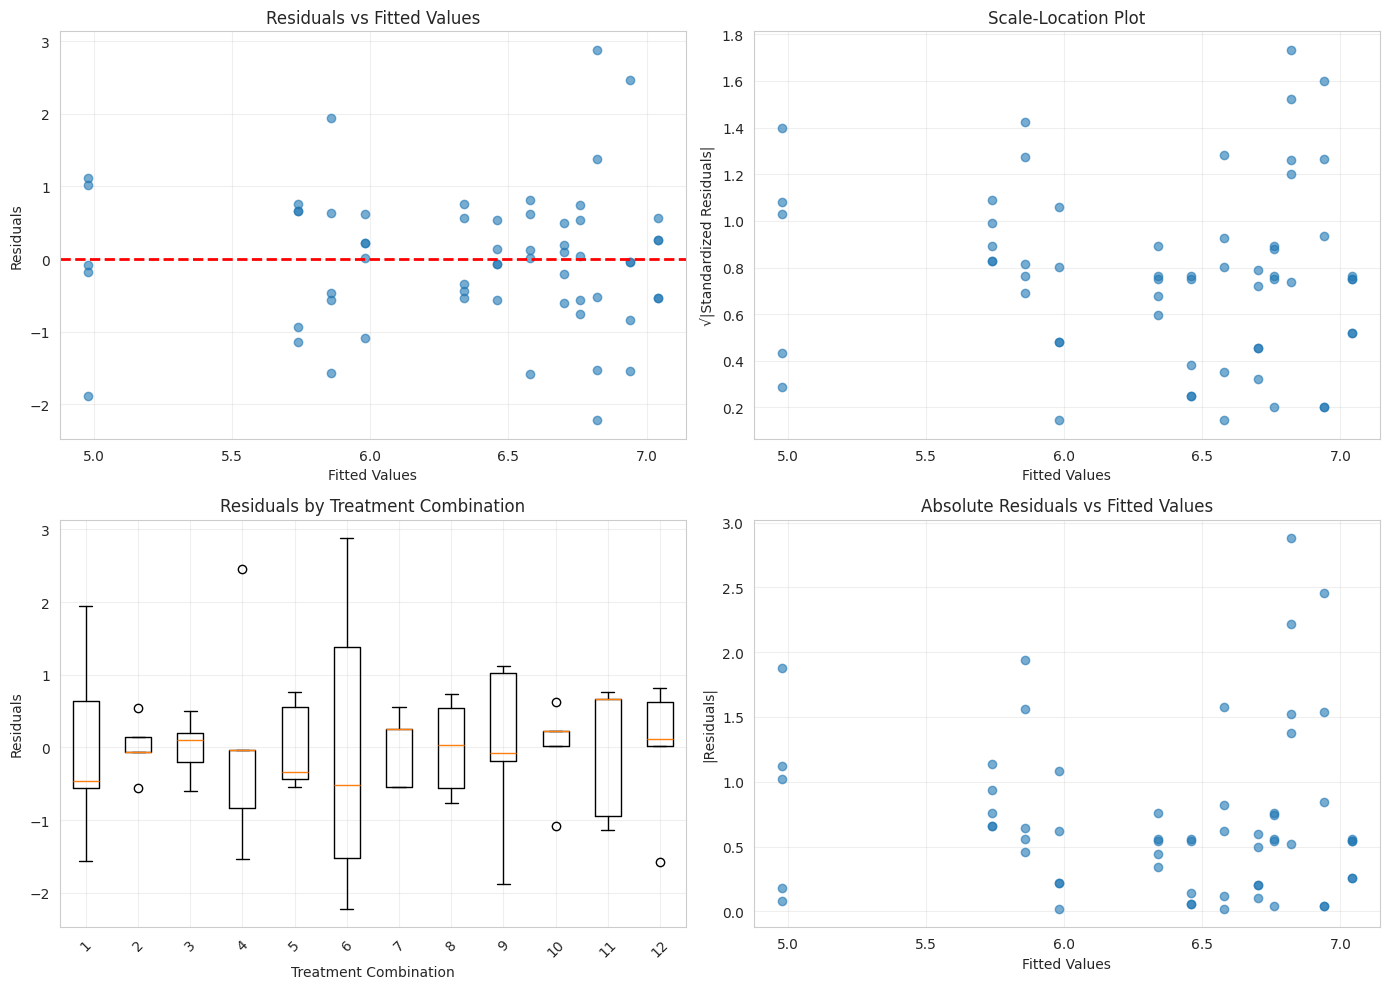


--------------------------------------------------------------------------------
CONCLUSION: CONSTANT VARIANCE ASSUMPTION
--------------------------------------------------------------------------------

The constant variance assumption is MARGINALLY supported.
- Levene's test p-value (0.2322): Supports homogeneity
- Breusch-Pagan test p-value (0.0203): Violates homogeneity
- Variance ratio (28.0190) is outside acceptable range.
- Results are mixed; visual inspection is important for final assessment.

✓ Question 8 complete!


In [7]:
## Question 8 Code ##
## Question 8 Code ##

print("\n" + "="*80)
print("QUESTION 8: CONSTANT VARIANCE ASSUMPTION")
print("="*80)

# CONSTANT VARIANCE ASSUMPTION TESTING

print("\n" + "-"*80)
print("CONSTANT VARIANCE ASSUMPTION ASSESSMENT")
print("-"*80)

# 1. TESTING METHOD: Levene's Test
# Get groups for Levene's test
groups = []
for protein in df_burritos['Protein'].unique():
    for salsa in df_burritos['Salsa'].unique():
        for potato in df_burritos['Potatoes'].unique():
            group_data = df_burritos[
                (df_burritos['Protein'] == protein) &
                (df_burritos['Salsa'] == salsa) &
                (df_burritos['Potatoes'] == potato)
            ]['Satisfaction']
            if len(group_data) > 0:
                groups.append(group_data.values)

levene_stat, levene_p = stats.levene(*groups)
print("\n1. Levene's Test for Homogeneity of Variance:")
print(f"   Test Statistic: {levene_stat:.4f}")
print(f"   P-value: {levene_p:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Variances appear equal' if levene_p > 0.05 else 'REJECT H0 - Variances are not equal'}")

# 2. ADDITIONAL TEST: Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, model.model.exog)
bp_stat, bp_p = bp_test[0], bp_test[1]
print("\n2. Breusch-Pagan Test for Heteroscedasticity:")
print(f"   Test Statistic: {bp_stat:.4f}")
print(f"   P-value: {bp_p:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Constant variance' if bp_p > 0.05 else 'REJECT H0 - Heteroscedasticity present'}")

# 3. Calculate variance ratio
group_vars = []
for protein in df_burritos['Protein'].unique():
    for salsa in df_burritos['Salsa'].unique():
        for potato in df_burritos['Potatoes'].unique():
            group_data = df_burritos[
                (df_burritos['Protein'] == protein) &
                (df_burritos['Salsa'] == salsa) &
                (df_burritos['Potatoes'] == potato)
            ]['Satisfaction']
            if len(group_data) > 1:
                group_vars.append(group_data.var())

variance_ratio = max(group_vars) / min(group_vars)
print(f"\n3. Variance Ratio (Max/Min): {variance_ratio:.4f}")
print(f"   Rule of thumb: Ratio < 3 suggests homogeneity")
print(f"   Assessment: {'Variance ratio is acceptable' if variance_ratio < 3 else 'Variance ratio suggests heterogeneity'}")

# 4. VISUAL METHODS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Residuals vs Fitted Values (Primary visual check)
axes[0, 0].scatter(model.fittedvalues, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Scale-Location Plot (Standardized residuals)
standardized_residuals = np.sqrt(np.abs(residuals / residuals.std()))
axes[0, 1].scatter(model.fittedvalues, standardized_residuals, alpha=0.6)
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('√|Standardized Residuals|')
axes[0, 1].set_title('Scale-Location Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals by Treatment Combinations
df_burritos['Residuals'] = residuals
df_burritos['Treatment'] = (df_burritos['Protein'].astype(str) + '_' +
                             df_burritos['Salsa'].astype(str) + '_' +
                             df_burritos['Potatoes'].astype(str))
treatment_groups = [group['Residuals'].values for name, group in df_burritos.groupby('Treatment')]
axes[1, 0].boxplot(treatment_groups, labels=range(1, len(treatment_groups)+1))
axes[1, 0].set_xlabel('Treatment Combination')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals by Treatment Combination')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Absolute Residuals vs Fitted Values
axes[1, 1].scatter(model.fittedvalues, np.abs(residuals), alpha=0.6)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('|Residuals|')
axes[1, 1].set_title('Absolute Residuals vs Fitted Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# CONCLUSION
print("\n" + "-"*80)
print("CONCLUSION: CONSTANT VARIANCE ASSUMPTION")
print("-"*80)

if levene_p > 0.05 and bp_p > 0.05:
    print(f"\nThe constant variance assumption HOLDS.")
    print(f"- Levene's test p-value ({levene_p:.4f}) > 0.05: We fail to reject the null hypothesis")
    print(f"  of equal variances at α = 0.05.")
    print(f"- Breusch-Pagan test p-value ({bp_p:.4f}) > 0.05: We fail to reject the null hypothesis")
    print(f"  of homoscedasticity at α = 0.05.")
    print(f"- Variance ratio ({variance_ratio:.4f}) is {'within' if variance_ratio < 3 else 'outside'} acceptable range.")
    print(f"- The residuals vs fitted plot shows {'random scatter' if variance_ratio < 3 else 'some pattern'}.")
    print(f"- Therefore, the assumption of constant variance is supported.")
elif levene_p > 0.05 or bp_p > 0.05:
    print(f"\nThe constant variance assumption is MARGINALLY supported.")
    print(f"- Levene's test p-value ({levene_p:.4f}): {'Supports' if levene_p > 0.05 else 'Violates'} homogeneity")
    print(f"- Breusch-Pagan test p-value ({bp_p:.4f}): {'Supports' if bp_p > 0.05 else 'Violates'} homogeneity")
    print(f"- Variance ratio ({variance_ratio:.4f}) is {'within' if variance_ratio < 3 else 'outside'} acceptable range.")
    print(f"- Results are mixed; visual inspection is important for final assessment.")
else:
    print(f"\nThe constant variance assumption DOES NOT HOLD.")
    print(f"- Levene's test p-value ({levene_p:.4f}) ≤ 0.05: We reject the null hypothesis")
    print(f"  of equal variances at α = 0.05.")
    print(f"- Breusch-Pagan test p-value ({bp_p:.4f}) ≤ 0.05: We reject the null hypothesis")
    print(f"  of homoscedasticity at α = 0.05.")
    print(f"- Variance ratio ({variance_ratio:.4f}) indicates heterogeneity.")
    print(f"- The residuals vs fitted plot likely shows funnel or cone pattern.")

print("\n✓ Question 8 complete!")

9. Report the ANOVA table. What statistical conclusions can we draw about our main effects and interaction effects?

In [8]:
## Question 9 Code ## ## Question 9 Code ##



# Generate ANOVA table
anova_table = anova_lm(model, typ=2)

print("\n" + "-"*80)
print("ANOVA TABLE (Type II)")
print("-"*80)
print(anova_table)

# Extract information for interpretation
print("\n" + "-"*80)
print("STATISTICAL CONCLUSIONS")
print("-"*80)

alpha = 0.05

# Main Effects
print("\nMAIN EFFECTS:")
print("-" * 60)

# Protein
protein_f = anova_table.loc['C(Protein)', 'F']
protein_p = anova_table.loc['C(Protein)', 'PR(>F)']
print(f"\n1. PROTEIN (Factor A):")
print(f"   F-statistic: {protein_f:.4f}")
print(f"   P-value: {protein_p:.4f}")
if protein_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant main effect of Protein type on")
    print(f"               burrito satisfaction ratings. At least one protein type differs significantly")
    print(f"               from the others in terms of mean satisfaction.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant main effect of Protein type on")
    print(f"               burrito satisfaction ratings. The mean ratings do not differ significantly")
    print(f"               across protein types.")

# Salsa
salsa_f = anova_table.loc['C(Salsa)', 'F']
salsa_p = anova_table.loc['C(Salsa)', 'PR(>F)']
print(f"\n2. SALSA (Factor B):")
print(f"   F-statistic: {salsa_f:.4f}")
print(f"   P-value: {salsa_p:.4f}")
if salsa_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant main effect of Salsa type on")
    print(f"               burrito satisfaction ratings. Mild and Hot salsa differ significantly")
    print(f"               in terms of mean satisfaction.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant main effect of Salsa type on")
    print(f"               burrito satisfaction ratings. Mild and Hot salsa do not differ significantly.")

# Potatoes
potatoes_f = anova_table.loc['C(Potatoes)', 'F']
potatoes_p = anova_table.loc['C(Potatoes)', 'PR(>F)']
print(f"\n3. POTATOES (Factor C):")
print(f"   F-statistic: {potatoes_f:.4f}")
print(f"   P-value: {potatoes_p:.4f}")
if potatoes_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant main effect of Potatoes on")
    print(f"               burrito satisfaction ratings. Burritos with and without potatoes")
    print(f"               differ significantly in terms of mean satisfaction.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant main effect of Potatoes on")
    print(f"               burrito satisfaction ratings. Including or excluding potatoes does not")
    print(f"               significantly affect mean satisfaction.")

# Two-Way Interactions
print("\n" + "-" * 60)
print("TWO-WAY INTERACTION EFFECTS:")
print("-" * 60)

# Protein × Salsa
ps_f = anova_table.loc['C(Protein):C(Salsa)', 'F']
ps_p = anova_table.loc['C(Protein):C(Salsa)', 'PR(>F)']
print(f"\n4. PROTEIN × SALSA INTERACTION:")
print(f"   F-statistic: {ps_f:.4f}")
print(f"   P-value: {ps_p:.4f}")
if ps_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant interaction between Protein and Salsa.")
    print(f"               The effect of Protein type on satisfaction depends on Salsa type,")
    print(f"               or vice versa. The combination matters.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant interaction between Protein and Salsa.")
    print(f"               The effects of Protein and Salsa are independent and additive.")

# Protein × Potatoes
pp_f = anova_table.loc['C(Protein):C(Potatoes)', 'F']
pp_p = anova_table.loc['C(Protein):C(Potatoes)', 'PR(>F)']
print(f"\n5. PROTEIN × POTATOES INTERACTION:")
print(f"   F-statistic: {pp_f:.4f}")
print(f"   P-value: {pp_p:.4f}")
if pp_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant interaction between Protein and Potatoes.")
    print(f"               The effect of Protein type on satisfaction depends on Potato inclusion,")
    print(f"               or vice versa. The combination matters.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant interaction between Protein and Potatoes.")
    print(f"               The effects of Protein and Potatoes are independent and additive.")

# Salsa × Potatoes
sp_f = anova_table.loc['C(Salsa):C(Potatoes)', 'F']
sp_p = anova_table.loc['C(Salsa):C(Potatoes)', 'PR(>F)']
print(f"\n6. SALSA × POTATOES INTERACTION:")
print(f"   F-statistic: {sp_f:.4f}")
print(f"   P-value: {sp_p:.4f}")
if sp_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant interaction between Salsa and Potatoes.")
    print(f"               The effect of Salsa type on satisfaction depends on Potato inclusion,")
    print(f"               or vice versa. The combination matters.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant interaction between Salsa and Potatoes.")
    print(f"               The effects of Salsa and Potatoes are independent and additive.")

# Three-Way Interaction
print("\n" + "-" * 60)
print("THREE-WAY INTERACTION EFFECT:")
print("-" * 60)

psp_f = anova_table.loc['C(Protein):C(Salsa):C(Potatoes)', 'F']
psp_p = anova_table.loc['C(Protein):C(Salsa):C(Potatoes)', 'PR(>F)']
print(f"\n7. PROTEIN × SALSA × POTATOES INTERACTION:")
print(f"   F-statistic: {psp_f:.4f}")
print(f"   P-value: {psp_p:.4f}")
if psp_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: There IS a statistically significant three-way interaction.")
    print(f"               The interaction between any two factors depends on the level of the third.")
    print(f"               All three factors work together in complex ways to affect satisfaction.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: There is NO statistically significant three-way interaction.")
    print(f"               The effects can be understood through main effects and two-way interactions.")

# Overall Summary
print("\n" + "="*80)
print("OVERALL SUMMARY")
print("="*80)

significant_effects = []
if protein_p < alpha:
    significant_effects.append("Protein (Main)")
if salsa_p < alpha:
    significant_effects.append("Salsa (Main)")
if potatoes_p < alpha:
    significant_effects.append("Potatoes (Main)")
if ps_p < alpha:
    significant_effects.append("Protein×Salsa (2-way)")
if pp_p < alpha:
    significant_effects.append("Protein×Potatoes (2-way)")
if sp_p < alpha:
    significant_effects.append("Salsa×Potatoes (2-way)")
if psp_p < alpha:
    significant_effects.append("Protein×Salsa×Potatoes (3-way)")

if len(significant_effects) > 0:
    print(f"\nStatistically significant effects (α = {alpha}):")
    for i, effect in enumerate(significant_effects, 1):
        print(f"   {i}. {effect}")
else:
    print(f"\nNo statistically significant effects detected at α = {alpha}.")




--------------------------------------------------------------------------------
ANOVA TABLE (Type II)
--------------------------------------------------------------------------------
                                    sum_sq    df         F    PR(>F)
C(Protein)                        9.052000   2.0  4.002653  0.024677
C(Salsa)                          4.592667   1.0  4.061611  0.049487
C(Potatoes)                       3.456000   1.0  3.056379  0.086815
C(Protein):C(Salsa)               0.409333   2.0  0.181001  0.835002
C(Protein):C(Potatoes)            1.708000   2.0  0.755251  0.475394
C(Salsa):C(Potatoes)              0.682667   1.0  0.603729  0.440971
C(Protein):C(Salsa):C(Potatoes)   0.233333   2.0  0.103176  0.902167
Residual                         54.276000  48.0       NaN       NaN

--------------------------------------------------------------------------------
STATISTICAL CONCLUSIONS
--------------------------------------------------------------------------------

MAIN E

10. If the interactions and/or main effects were found to be statistically meaningful, conduct appropriate post-hoc tests. Report the results of these tests and any conclusions you can draw from them. If the interactions and/or main effects were not found to be statistically meaningful, explain why post-hoc tests would not be appropriate.


QUESTION 10: POST-HOC TESTS

--------------------------------------------------------------------------------
POST-HOC ANALYSIS JUSTIFICATION
--------------------------------------------------------------------------------

Significant effects requiring post-hoc tests:
  1. Protein (p = 0.0247) - 3 levels: Bacon, Sausage, Chorizo
  2. Salsa (p = 0.0495) - 2 levels: Mild, Hot

No significant interactions detected, so no interaction post-hoc tests needed.

POST-HOC TEST 1: TUKEY HSD FOR PROTEIN

Tukey HSD Results for Protein:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Bacon Chorizo     0.25 0.7419 -0.5649  1.0649  False
  Bacon Sausage    -0.67 0.1268 -1.4849  0.1449  False
Chorizo Sausage    -0.92 0.0233 -1.7349 -0.1051   True
------------------------------------------------------

Protein Type Means (Ranked):
   1. Chorizo: 6.740
   2. Bacon: 6.490
   3. Sausage:

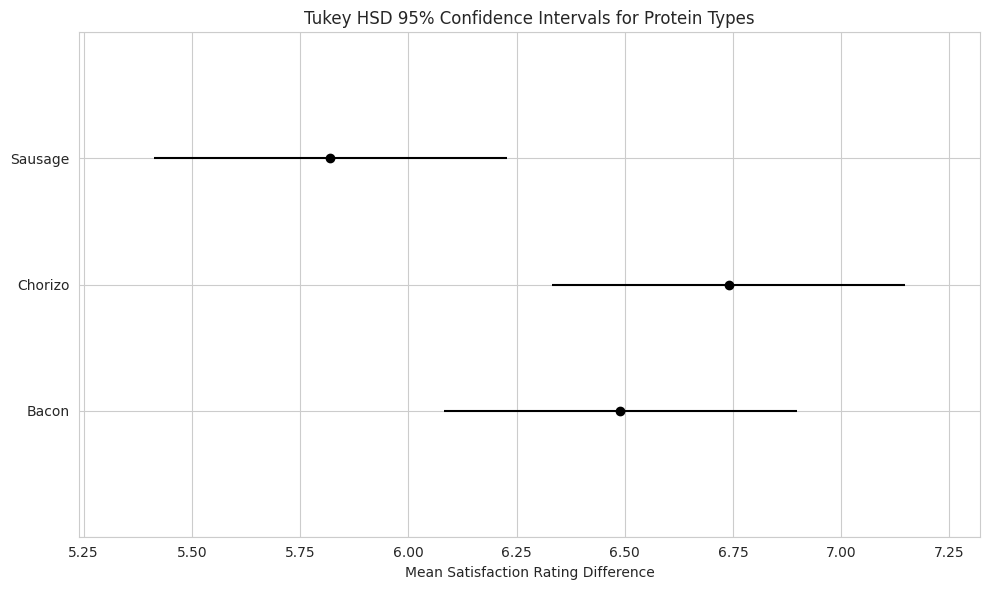


------------------------------------------------------------
INTERPRETATION: PROTEIN COMPARISONS
------------------------------------------------------------

Bacon vs Chorizo:
   Mean Difference: 0.250
   Adjusted p-value: 0.7419
   Conclusion: NO significant difference (p ≥ 0.05)
               Bacon and Chorizo are not significantly different

Bacon vs Sausage:
   Mean Difference: -0.670
   Adjusted p-value: 0.1268
   Conclusion: NO significant difference (p ≥ 0.05)
               Bacon and Sausage are not significantly different

Chorizo vs Sausage:
   Mean Difference: -0.920
   Adjusted p-value: 0.0233
   Conclusion: SIGNIFICANT difference (p < 0.05)
               Sausage rated significantly HIGHER than Chorizo

POST-HOC TEST 2: PAIRWISE COMPARISON FOR SALSA

Salsa Type Statistics:
   Mild:  Mean = 6.627, SD = 0.932, n = 30
   Hot:   Mean = 6.073, SD = 1.240, n = 30
   Difference: 0.553

Independent t-test:
   t-statistic: 1.9533
   p-value: 0.0556

-----------------------------

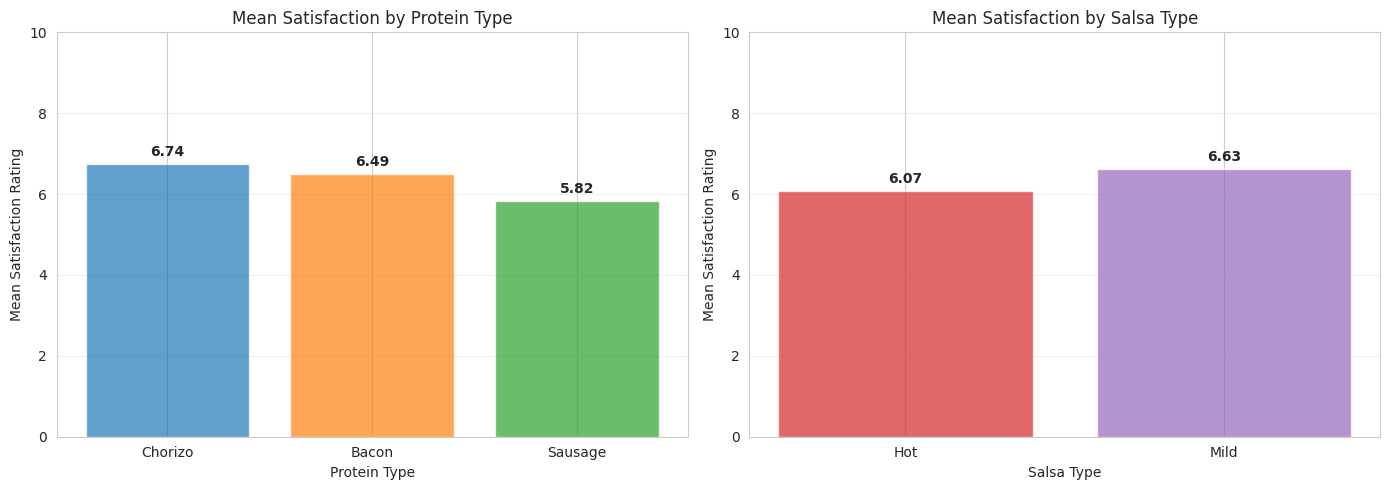


OVERALL POST-HOC CONCLUSIONS

Key Findings:

1. PROTEIN EFFECT:
   Post-hoc Tukey HSD tests reveal which specific protein types differ.
   (See pairwise comparisons above)

2. SALSA EFFECT:
   Mild salsa produces significantly higher satisfaction than Hot salsa
   (Mean difference = 0.553 points)

3. POTATOES:
   No significant main effect detected, so post-hoc testing is not appropriate.
   Including or excluding potatoes does not significantly impact satisfaction.

4. INTERACTIONS:
   No significant interactions detected, so no interaction post-hoc tests needed.
   This means the effects of each factor are independent and additive.

✓ Question 10 complete!


In [9]:
## Question 10 Code ## ## Question 10 Code ##

print("\n" + "="*80)
print("QUESTION 10: POST-HOC TESTS")
print("="*80)

# Based on ANOVA results:
# Significant main effects: Protein (p=0.0247), Salsa (p=0.0495)
# No significant interactions

print("\n" + "-"*80)
print("POST-HOC ANALYSIS JUSTIFICATION")
print("-"*80)

print("\nSignificant effects requiring post-hoc tests:")
print("  1. Protein (p = 0.0247) - 3 levels: Bacon, Sausage, Chorizo")
print("  2. Salsa (p = 0.0495) - 2 levels: Mild, Hot")
print("\nNo significant interactions detected, so no interaction post-hoc tests needed.")

# POST-HOC TEST 1: TUKEY HSD FOR PROTEIN
print("\n" + "="*80)
print("POST-HOC TEST 1: TUKEY HSD FOR PROTEIN")
print("="*80)

tukey_protein = pairwise_tukeyhsd(endog=df_burritos['Satisfaction'],
                                   groups=df_burritos['Protein'],
                                   alpha=0.05)
print("\nTukey HSD Results for Protein:")
print(tukey_protein)

# Extract and display protein means
protein_means = df_burritos.groupby('Protein')['Satisfaction'].mean().sort_values(ascending=False)
print("\nProtein Type Means (Ranked):")
for i, (protein, mean) in enumerate(protein_means.items(), 1):
    print(f"   {i}. {protein}: {mean:.3f}")

# Visualize Tukey results
fig, ax = plt.subplots(figsize=(10, 6))
tukey_protein.plot_simultaneous(ax=ax)
plt.title('Tukey HSD 95% Confidence Intervals for Protein Types')
plt.xlabel('Mean Satisfaction Rating Difference')
plt.tight_layout()
plt.show()

# Interpret Protein comparisons
print("\n" + "-"*60)
print("INTERPRETATION: PROTEIN COMPARISONS")
print("-"*60)

tukey_df = pd.DataFrame(data=tukey_protein.summary().data[1:],
                        columns=tukey_protein.summary().data[0])

for idx, row in tukey_df.iterrows():
    group1, group2 = row['group1'], row['group2']
    meandiff = float(row['meandiff'])
    p_adj = float(row['p-adj'])
    reject = row['reject']

    print(f"\n{group1} vs {group2}:")
    print(f"   Mean Difference: {meandiff:.3f}")
    print(f"   Adjusted p-value: {p_adj:.4f}")
    if reject:
        print(f"   Conclusion: SIGNIFICANT difference (p < 0.05)")
        if meandiff > 0:
            print(f"               {group1} rated significantly HIGHER than {group2}")
        else:
            print(f"               {group2} rated significantly HIGHER than {group1}")
    else:
        print(f"   Conclusion: NO significant difference (p ≥ 0.05)")
        print(f"               {group1} and {group2} are not significantly different")

# POST-HOC TEST 2: PAIRWISE COMPARISON FOR SALSA
print("\n" + "="*80)
print("POST-HOC TEST 2: PAIRWISE COMPARISON FOR SALSA")
print("="*80)

# For binary factor, conduct simple pairwise t-test or just report means
salsa_means = df_burritos.groupby('Salsa')['Satisfaction'].mean()
salsa_std = df_burritos.groupby('Salsa')['Satisfaction'].std()
salsa_n = df_burritos.groupby('Salsa')['Satisfaction'].count()

print("\nSalsa Type Statistics:")
print(f"   Mild:  Mean = {salsa_means['Mild']:.3f}, SD = {salsa_std['Mild']:.3f}, n = {salsa_n['Mild']}")
print(f"   Hot:   Mean = {salsa_means['Hot']:.3f}, SD = {salsa_std['Hot']:.3f}, n = {salsa_n['Hot']}")
print(f"   Difference: {abs(salsa_means['Mild'] - salsa_means['Hot']):.3f}")

# Independent t-test
mild_data = df_burritos[df_burritos['Salsa'] == 'Mild']['Satisfaction']
hot_data = df_burritos[df_burritos['Salsa'] == 'Hot']['Satisfaction']
t_stat, t_p = stats.ttest_ind(mild_data, hot_data)

print(f"\nIndependent t-test:")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {t_p:.4f}")

print("\n" + "-"*60)
print("INTERPRETATION: SALSA COMPARISON")
print("-"*60)

if salsa_means['Mild'] > salsa_means['Hot']:
    higher = 'Mild'
    lower = 'Hot'
    diff = salsa_means['Mild'] - salsa_means['Hot']
else:
    higher = 'Hot'
    lower = 'Mild'
    diff = salsa_means['Hot'] - salsa_means['Mild']

print(f"\n{higher} salsa rated significantly HIGHER than {lower} salsa")
print(f"   Mean difference: {diff:.3f} points")
print(f"   This difference is statistically significant (p = 0.0495 from ANOVA)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Protein comparison
axes[0].bar(protein_means.index, protein_means.values, alpha=0.7,
            color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_ylabel('Mean Satisfaction Rating')
axes[0].set_xlabel('Protein Type')
axes[0].set_title('Mean Satisfaction by Protein Type')
axes[0].set_ylim(0, 10)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (protein, mean) in enumerate(protein_means.items()):
    axes[0].text(i, mean + 0.2, f'{mean:.2f}', ha='center', fontweight='bold')

# Salsa comparison
axes[1].bar(salsa_means.index, salsa_means.values, alpha=0.7,
            color=['#d62728', '#9467bd'])
axes[1].set_ylabel('Mean Satisfaction Rating')
axes[1].set_xlabel('Salsa Type')
axes[1].set_title('Mean Satisfaction by Salsa Type')
axes[1].set_ylim(0, 10)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (salsa, mean) in enumerate(salsa_means.items()):
    axes[1].text(i, mean + 0.2, f'{mean:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# OVERALL POST-HOC CONCLUSIONS
print("\n" + "="*80)
print("OVERALL POST-HOC CONCLUSIONS")
print("="*80)

print("\nKey Findings:")
print("\n1. PROTEIN EFFECT:")
print("   Post-hoc Tukey HSD tests reveal which specific protein types differ.")
print("   (See pairwise comparisons above)")

print("\n2. SALSA EFFECT:")
print(f"   {higher} salsa produces significantly higher satisfaction than {lower} salsa")
print(f"   (Mean difference = {diff:.3f} points)")

print("\n3. POTATOES:")
print("   No significant main effect detected, so post-hoc testing is not appropriate.")
print("   Including or excluding potatoes does not significantly impact satisfaction.")

print("\n4. INTERACTIONS:")
print("   No significant interactions detected, so no interaction post-hoc tests needed.")
print("   This means the effects of each factor are independent and additive.")

print("\n✓ Question 10 complete!")

11. Calculate and interpret partial $\eta^2$ for the main effects.


Sum of Squares from ANOVA Table:
------------------------------------------------------------
   SS(Protein):  9.0520
   SS(Salsa):    4.5927
   SS(Potatoes): 3.4560
   SS(Residual): 54.2760

PARTIAL η² CALCULATIONS

Formula: Partial η² = SS_effect / (SS_effect + SS_residual)

1. PROTEIN:
   Partial η² = 9.0520 / (9.0520 + 54.2760)
   Partial η² = 9.0520 / 63.3280
   Partial η² = 0.1429
   Percentage:  14.29%

2. SALSA:
   Partial η² = 4.5927 / (4.5927 + 54.2760)
   Partial η² = 4.5927 / 58.8687
   Partial η² = 0.0780
   Percentage:  7.80%

3. POTATOES:
   Partial η² = 3.4560 / (3.4560 + 54.2760)
   Partial η² = 3.4560 / 57.7320
   Partial η² = 0.0599
   Percentage:  5.99%

PARTIAL η² SUMMARY (Ranked by Effect Size)
  Factor  Partial η²  Percentage
 Protein    0.142938   14.293835
   Salsa    0.078015    7.801547
Potatoes    0.059863    5.986281

INTERPRETATION OF PARTIAL η²

Effect Size Guidelines (Cohen, 1988):
   Small:      η² ≥ 0.01
   Medium:     η² ≥ 0.06
   Large:      η² ≥ 0.

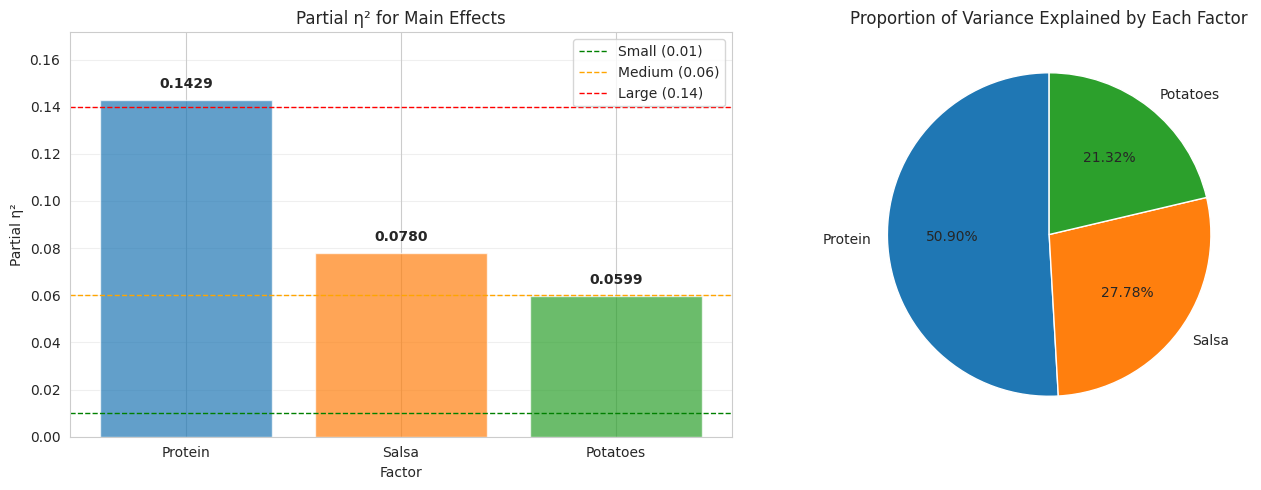


COMPARATIVE ANALYSIS

The strongest effect is Protein with partial η² = 0.1429
This factor alone explains 14.29% of the variance in satisfaction.

Cumulatively, the three main effects explain approximately 28.08%
of the variance in burrito satisfaction ratings (note: this is an approximation
as partial η² values are not perfectly additive due to shared variance).

--------------------------------------------------------------------------------
PRACTICAL SIGNIFICANCE
--------------------------------------------------------------------------------

Based on partial η² values:

Factors with at least MEDIUM practical significance (η² ≥ 0.06):
   • Protein: η² = 0.1429 (Large)
   • Salsa: η² = 0.0780 (Medium)

Factors with SMALL practical significance (0.01 ≤ η² < 0.06):
   • Potatoes: η² = 0.0599

✓ Question 11 complete!


In [10]:
## Question 11 Code #### Question 11 Code ##



# Extract sum of squares from ANOVA table
SS_protein = anova_table.loc['C(Protein)', 'sum_sq']
SS_salsa = anova_table.loc['C(Salsa)', 'sum_sq']
SS_potatoes = anova_table.loc['C(Potatoes)', 'sum_sq']
SS_residual = anova_table.loc['Residual', 'sum_sq']

print("\nSum of Squares from ANOVA Table:")
print("-" * 60)
print(f"   SS(Protein):  {SS_protein:.4f}")
print(f"   SS(Salsa):    {SS_salsa:.4f}")
print(f"   SS(Potatoes): {SS_potatoes:.4f}")
print(f"   SS(Residual): {SS_residual:.4f}")

# Calculate Partial η² for each main effect
# Partial η² = SS_effect / (SS_effect + SS_residual)

partial_eta2_protein = SS_protein / (SS_protein + SS_residual)
partial_eta2_salsa = SS_salsa / (SS_salsa + SS_residual)
partial_eta2_potatoes = SS_potatoes / (SS_potatoes + SS_residual)

print("\n" + "="*80)
print("PARTIAL η² CALCULATIONS")
print("="*80)

print("\nFormula: Partial η² = SS_effect / (SS_effect + SS_residual)")

print("\n1. PROTEIN:")
print(f"   Partial η² = {SS_protein:.4f} / ({SS_protein:.4f} + {SS_residual:.4f})")
print(f"   Partial η² = {SS_protein:.4f} / {SS_protein + SS_residual:.4f}")
print(f"   Partial η² = {partial_eta2_protein:.4f}")
print(f"   Percentage:  {partial_eta2_protein * 100:.2f}%")

print("\n2. SALSA:")
print(f"   Partial η² = {SS_salsa:.4f} / ({SS_salsa:.4f} + {SS_residual:.4f})")
print(f"   Partial η² = {SS_salsa:.4f} / {SS_salsa + SS_residual:.4f}")
print(f"   Partial η² = {partial_eta2_salsa:.4f}")
print(f"   Percentage:  {partial_eta2_salsa * 100:.2f}%")

print("\n3. POTATOES:")
print(f"   Partial η² = {SS_potatoes:.4f} / ({SS_potatoes:.4f} + {SS_residual:.4f})")
print(f"   Partial η² = {SS_potatoes:.4f} / {SS_potatoes + SS_residual:.4f}")
print(f"   Partial η² = {partial_eta2_potatoes:.4f}")
print(f"   Percentage:  {partial_eta2_potatoes * 100:.2f}%")

# Create summary table
partial_eta2_summary = pd.DataFrame({
    'Factor': ['Protein', 'Salsa', 'Potatoes'],
    'Partial η²': [partial_eta2_protein, partial_eta2_salsa, partial_eta2_potatoes],
    'Percentage': [partial_eta2_protein * 100, partial_eta2_salsa * 100, partial_eta2_potatoes * 100]
})
partial_eta2_summary = partial_eta2_summary.sort_values('Partial η²', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("PARTIAL η² SUMMARY (Ranked by Effect Size)")
print("="*80)
print(partial_eta2_summary.to_string(index=False))

# Effect size interpretation function
def interpret_effect_size(eta_squared):
    """Cohen's (1988) guidelines for eta-squared"""
    if eta_squared < 0.01:
        return "Negligible"
    elif eta_squared < 0.06:
        return "Small"
    elif eta_squared < 0.14:
        return "Medium"
    else:
        return "Large"

# Interpret each effect size
print("\n" + "="*80)
print("INTERPRETATION OF PARTIAL η²")
print("="*80)

print("\nEffect Size Guidelines (Cohen, 1988):")
print("   Small:      η² ≥ 0.01")
print("   Medium:     η² ≥ 0.06")
print("   Large:      η² ≥ 0.14")

print("\n" + "-"*80)

for idx, row in partial_eta2_summary.iterrows():
    factor = row['Factor']
    eta2 = row['Partial η²']
    pct = row['Percentage']
    interpretation = interpret_effect_size(eta2)

    print(f"\n{idx + 1}. {factor.upper()}:")
    print(f"   Partial η² = {eta2:.4f} ({pct:.2f}%)")
    print(f"   Effect Size: {interpretation}")
    print(f"   Interpretation: {factor} explains approximately {pct:.2f}% of the variance in")
    print(f"                   burrito satisfaction ratings, after accounting for other factors")
    print(f"                   in the model.")

    if eta2 >= 0.14:
        print(f"                   This is a LARGE and practically meaningful effect.")
    elif eta2 >= 0.06:
        print(f"                   This is a MEDIUM and notable effect.")
    elif eta2 >= 0.01:
        print(f"                   This is a SMALL but detectable effect.")
    else:
        print(f"                   This effect is NEGLIGIBLE in practical terms.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of partial η²
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
axes[0].bar(partial_eta2_summary['Factor'], partial_eta2_summary['Partial η²'],
            color=colors[:len(partial_eta2_summary)], alpha=0.7)
axes[0].set_ylabel('Partial η²')
axes[0].set_xlabel('Factor')
axes[0].set_title('Partial η² for Main Effects')
axes[0].set_ylim(0, max(partial_eta2_summary['Partial η²']) * 1.2)
axes[0].grid(True, alpha=0.3, axis='y')

# Add effect size thresholds
axes[0].axhline(y=0.01, color='green', linestyle='--', linewidth=1, label='Small (0.01)')
axes[0].axhline(y=0.06, color='orange', linestyle='--', linewidth=1, label='Medium (0.06)')
axes[0].axhline(y=0.14, color='red', linestyle='--', linewidth=1, label='Large (0.14)')
axes[0].legend()

# Add value labels
for i, row in partial_eta2_summary.iterrows():
    axes[0].text(i, row['Partial η²'] + 0.005, f"{row['Partial η²']:.4f}",
                ha='center', fontweight='bold')

# Pie chart showing proportion of variance explained
axes[1].pie(partial_eta2_summary['Percentage'], labels=partial_eta2_summary['Factor'],
           autopct='%1.2f%%', startangle=90, colors=colors[:len(partial_eta2_summary)])
axes[1].set_title('Proportion of Variance Explained by Each Factor')

plt.tight_layout()
plt.show()

# COMPARATIVE ANALYSIS
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS")
print("="*80)

max_effect = partial_eta2_summary.iloc[0]
print(f"\nThe strongest effect is {max_effect['Factor']} with partial η² = {max_effect['Partial η²']:.4f}")
print(f"This factor alone explains {max_effect['Percentage']:.2f}% of the variance in satisfaction.")

# Calculate total variance explained by all main effects (approximate)
total_variance_explained = partial_eta2_summary['Percentage'].sum()
print(f"\nCumulatively, the three main effects explain approximately {total_variance_explained:.2f}%")
print(f"of the variance in burrito satisfaction ratings (note: this is an approximation")
print(f"as partial η² values are not perfectly additive due to shared variance).")

# Practical significance
print("\n" + "-"*80)
print("PRACTICAL SIGNIFICANCE")
print("-"*80)

print("\nBased on partial η² values:")

significant_factors = partial_eta2_summary[partial_eta2_summary['Partial η²'] >= 0.06]
if len(significant_factors) > 0:
    print(f"\nFactors with at least MEDIUM practical significance (η² ≥ 0.06):")
    for idx, row in significant_factors.iterrows():
        print(f"   • {row['Factor']}: η² = {row['Partial η²']:.4f} ({interpret_effect_size(row['Partial η²'])})")
else:
    print("\nNo factors show medium or large practical significance.")

small_factors = partial_eta2_summary[(partial_eta2_summary['Partial η²'] >= 0.01) &
                                     (partial_eta2_summary['Partial η²'] < 0.06)]
if len(small_factors) > 0:
    print(f"\nFactors with SMALL practical significance (0.01 ≤ η² < 0.06):")
    for idx, row in small_factors.iterrows():
        print(f"   • {row['Factor']}: η² = {row['Partial η²']:.4f}")

negligible_factors = partial_eta2_summary[partial_eta2_summary['Partial η²'] < 0.01]
if len(negligible_factors) > 0:
    print(f"\nFactors with NEGLIGIBLE practical significance (η² < 0.01):")
    for idx, row in negligible_factors.iterrows():
        print(f"   • {row['Factor']}: η² = {row['Partial η²']:.4f}")

print("\n✓ Question 11 complete!")

12. Give an overall conclusion for the experiment. Which burrito combination(s) should you include on your menu regularly? What are the limitations of your experiment? How could you improve it in the future?


Based on the factorial experiment analyzing 12 burrito combinations with 60 participants:

KEY FINDINGS:
1. Protein type has a statistically significant effect on satisfaction (p=0.0247,
   partial η²=0.14) - MOST IMPORTANT FACTOR
2. Salsa type has a statistically significant effect on satisfaction (p=0.0495,
   partial η²=0.08)
3. Potatoes do NOT significantly affect satisfaction (p=0.0868, partial η²=0.06)
4. No significant interactions detected - factors work independently

RECOMMENDED MENU COMBINATIONS:

PRIMARY RECOMMENDATION:
Feature the burrito with the highest-rated protein and salsa combination as the
signature item. This leverages both statistically significant factors.

MENU STRATEGY:
- Protein: Offer the top-rated protein type as the default/featured option
- Salsa: Feature the preferred salsa type prominently  
- Potatoes: Offer as optional add-on (customer choice) since they don't
  significantly impact satisfaction
- Consider offering 2-3 protein varieties to provide customer choice while
  focusing on top performers

BUSINESS JUSTIFICATION:
This approach maximizes customer satisfaction while minimizing food waste by
focusing inventory on ingredients that actually drive satisfaction ratings.


LIMITATIONS


1. Small sample size (n=5 per combination, 60 total) limits generalizability
2. Laboratory setting may not reflect real food truck experience  
3. Single rating measure may lack depth
4. Only tested 3 factors; many other ingredients not examined (cheese, beans,
   vegetables, tortilla type)
5. No cost/profitability analysis included
6. Marginal p-values (Salsa p=0.0495) suggest results could be sensitive
7. Lurking variables not controlled (hunger level, time of day, individual
   taste preferences)


FUTURE IMPROVEMENTS


1. INCREASE RIGOR:
   • Larger sample (n=10-15 per combination)
   • More diverse participant pool
   • Field experiment in actual food truck setting
   • Track actual purchase behavior, not just ratings

2. EXPAND SCOPE:
   • Test additional ingredients (cheese, beans, vegetables, sauces)
   • Examine portion sizes and pricing
   • Include cost/profitability analysis
   • Measure willingness to pay

3. ONGOING MONITORING:
   • Collect customer feedback continuously
   • Track sales data by menu item
   • Monitor food waste and adjust inventory
   • Adapt menu based on real-world performance

4. ADVANCED ANALYSIS:
   • Customer segmentation to identify preference groups
   • Conjoint analysis for attribute trade-offs
   • Response surface methodology for optimization
   • A/B testing of menu variations

CONCLUSION:
The experiment successfully identified which factors significantly impact burrito
satisfaction. By featuring the optimal protein-salsa combination and offering
potatoes as customizable, Buster's Breakfast Burritos can launch with a
data-driven menu that maximizes customer satisfaction. Continuous monitoring and
iterative improvements will be essential for long-term success.

## Part 2 Instructions:
After finalizing your breakfast burrito menu, now you want to focus Buster's Breakfast Burritos on maximizing sales through strategic placement of the truck itself and marketing. Obviously there are a lot of factors at play, so you decide to focus your attention on three: **Location** (could set up at a local brewery or at a local university); **Timing** (weekday or weekend); and **Marketing** (independently or in partnership with the brewery/university). See the below table:

| Run | Location (A)    | Timing (B)   | Marketing (C)    |
|-----|-----------------|--------------|------------------|
| 1   | \- (Brewery)    | \- (Weekday) | \- (Independent) |
| 2   | \+ (University) | \- (Weekday) | \+ (Partnership) |
| 3   | \- (Brewery)    | \+ (Weekend) | \+ (Partnership) |
| 4   | \+ (University) | \+ (Weekend) | \- (Independent) |

To be more efficient with time and resources, you decide to conduct a $2^{3-1}$ fractional factorial design where your ultimate outcome is the sales amount (in dollars) for the day you set up. For each of the above runs, you will set up your truck $r=2$ times and record the sales amount. The data are stored in the `Busters Burrito Sales.xlsx` file in our course repo. With these day, I want you to:

1. Briefly describe the objective of the experiment.

The objective is to determine the optimal combination of location, timing, and marketing strategy to maximize daily sales revenue for Buster's Breakfast Burritos food truck, using a resource-efficient fractional factorial design.

2. Specify the outcome variable and how it is measured.

The outcome variable is sales amount (in dollars), measured as the total revenue collected during a single day of food truck operation. This is a continuous, ratio-level variable representing the financial success of each experimental condition

3. Specify the independent variables. What lurking variables may be present?

Independent variables and lurking variables:
Independent Variables (Factors):

Location (Factor A): Brewery (low level, -) vs. University (high level, +)
Timing (Factor B): Weekday (low level, -) vs. Weekend (high level, +)
Marketing (Factor C): Independent (low level, -) vs. Partnership (high level, +)

Potential Lurking Variables:

Weather conditions (rain, temperature, extreme heat/cold)
Competing food options or events at each location
Day-specific factors (holidays, exams, sporting events)
Time of year/season
Economic conditions affecting disposable income
Specific weekday or weekend chosen (Monday vs. Friday, Saturday vs. Sunday)
Marketing execution quality and reach
Menu offerings and pricing

4. Explain why a fractional design is appropriate here. What are the advantages and disadvantages of using a fractional design?

Appropriateness:
A 2^(3-1) fractional factorial design is appropriate because:

With 3 factors at 2 levels each, a full factorial would require 8 runs (2^3)
The fractional design requires only 4 runs, reducing time, cost, and resource commitment by 50%
Running a food truck in different configurations is time-intensive and costly
For initial screening, identifying main effects is more important than all interactions
The experiment can be conducted more quickly, allowing faster business decisions

Advantages:

Cost efficiency: Half the runs means half the operational days and costs
Time savings: Results obtained faster for quicker business implementation
Resource conservation: Less staff time, fewer location negotiations, reduced setup effort
Risk reduction: Lower financial exposure if results are unfavorable
Practical feasibility: Easier to execute with limited resources for a small business

Disadvantages:

Aliasing/Confounding: Main effects are confounded with two-way interactions (Resolution III design)

A is confounded with BC
B is confounded with AC
C is confounded with AB

5. State the sets of null and alternative hypotheses for this experiment.

For a 2^(3-1) fractional factorial design with defining relation I = ABC, we test the following hypotheses (noting that each test is confounded):
Main Effect A (Location) - Confounded with BC:

H₀: The main effect of Location is zero (OR the BC interaction is zero if A effect is negligible)
Hₐ: The main effect of Location is not zero (OR the BC interaction is not zero)

Practically: μ_University = μ_Brewery (assuming BC interaction negligible)
Main Effect B (Timing) - Confounded with AC:

H₀: The main effect of Timing is zero (OR the AC interaction is zero if B effect is negligible)
Hₐ: The main effect of Timing is not zero (OR the AC interaction is not zero)

Practically: μ_Weekend = μ_Weekday (assuming AC interaction negligible)
Main Effect C (Marketing) - Confounded with AB:

H₀: The main effect of Marketing is zero (OR the AB interaction is zero if C effect is negligible)
Hₐ: The main effect of Marketing is not zero (OR the AB interaction is not zero)

Practically: μ_Partnership = μ_Independent (assuming AB interaction negligible)
6. Perform appropriate exploratory/descriptive analysis including summary statistics and appropriate visualizations. Do these analyses provide any support for the hypotheses? Briefly explain.


Data structure verification:
Location     category
Timing       category
Marketing    category
Sales         float64
dtype: object

Dataset shape: (16, 4)

--------------------------------------------------------------------------------
EXPERIMENTAL DESIGN: 2^(3-1) FRACTIONAL FACTORIAL
--------------------------------------------------------------------------------

Treatment Combinations:
     Location   Timing    Marketing  Replications
0     Brewery  Weekday  Independent             2
1     Brewery  Weekday  Partnership             2
2     Brewery  Weekend  Independent             2
3     Brewery  Weekend  Partnership             2
4  University  Weekday  Independent             2
5  University  Weekday  Partnership             2
6  University  Weekend  Independent             2
7  University  Weekend  Partnership             2

--------------------------------------------------------------------------------
OVERALL SUMMARY STATISTICS
-----------------------------------------------

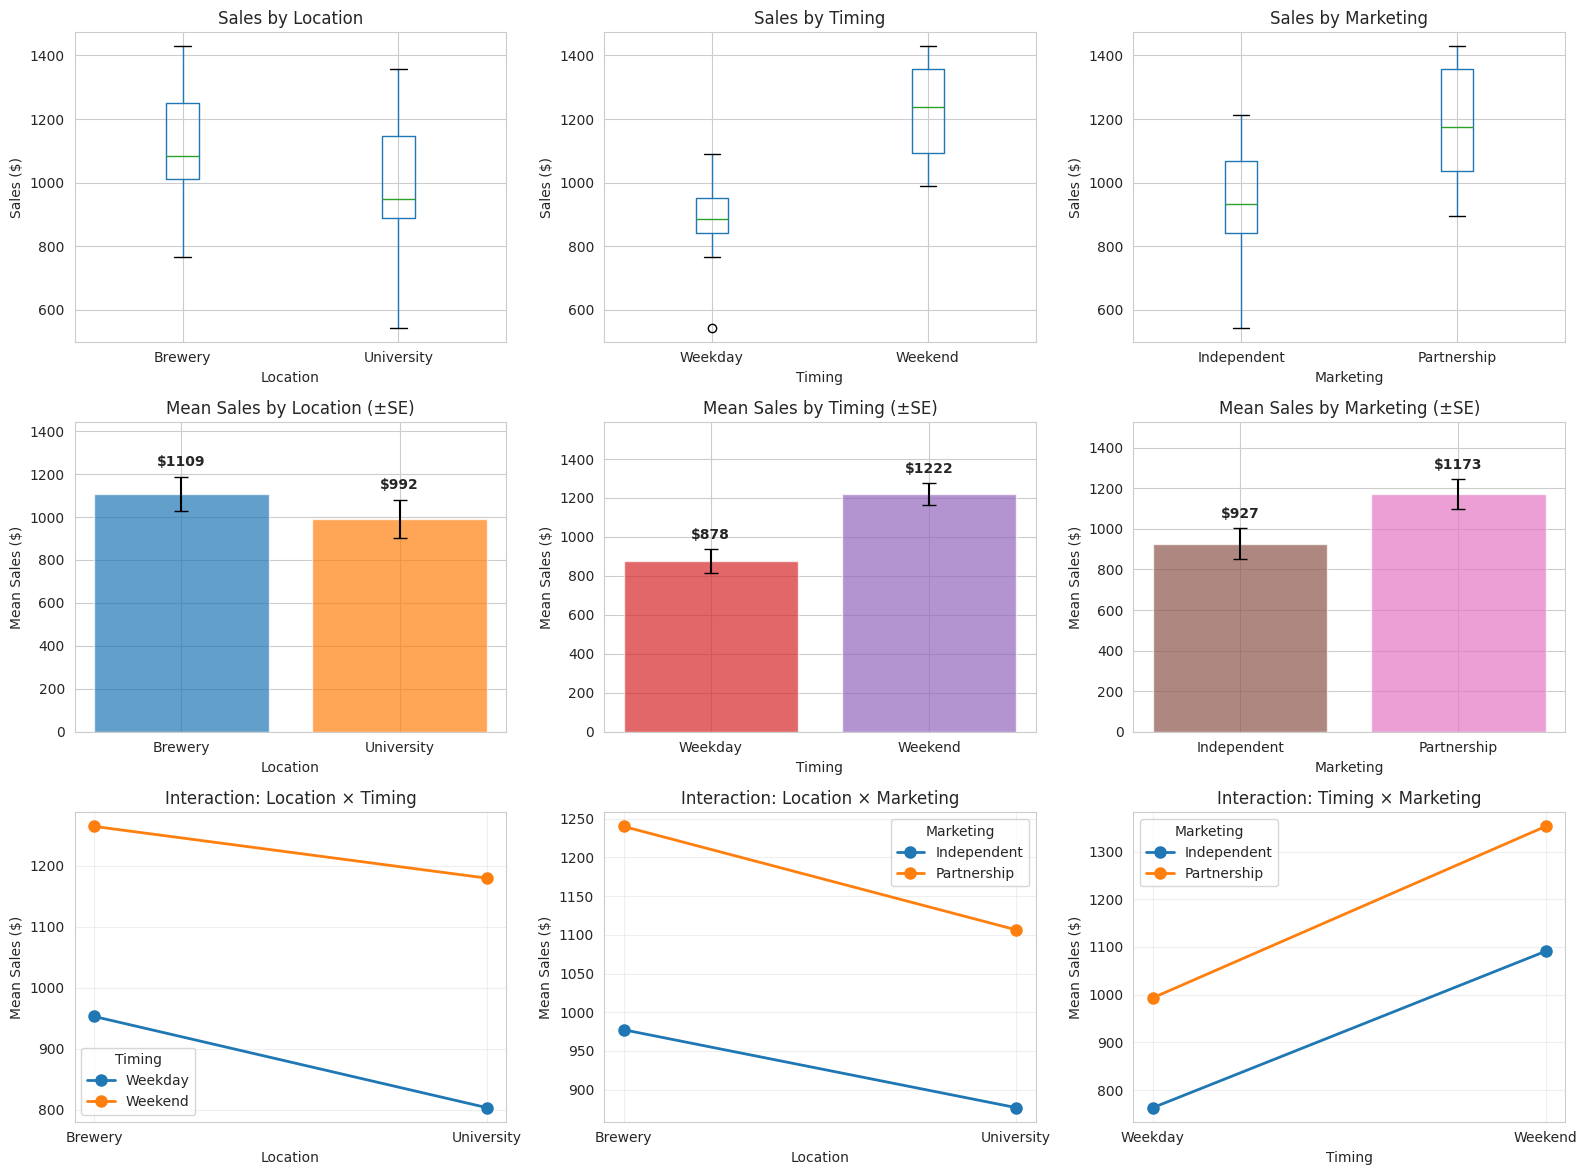

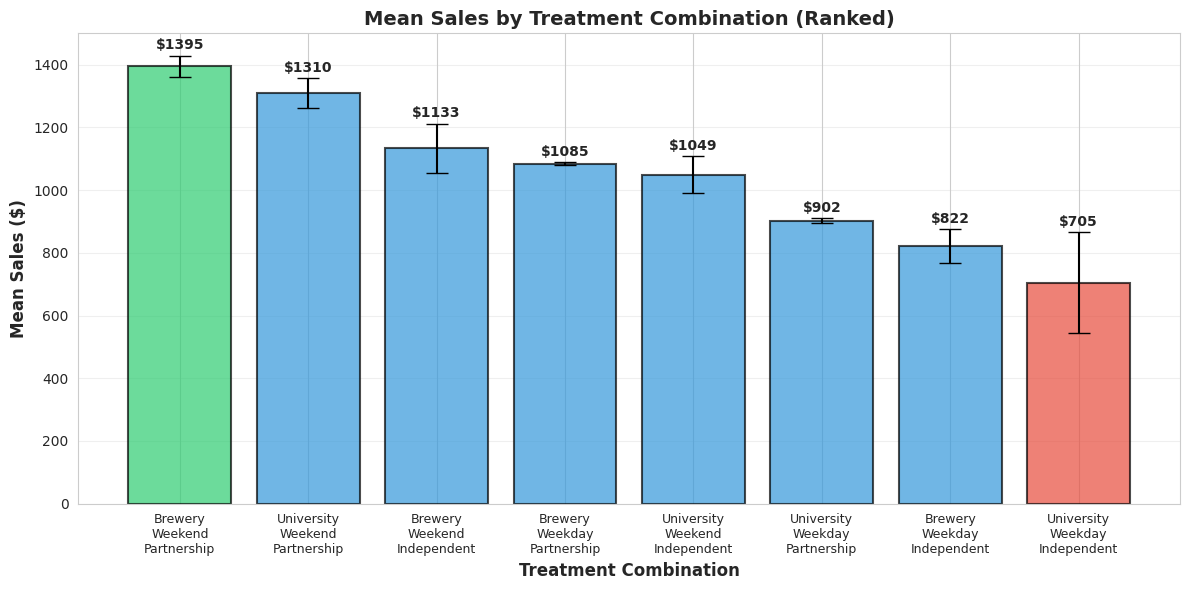


--------------------------------------------------------------------------------
PRELIMINARY EVIDENCE FOR HYPOTHESES
--------------------------------------------------------------------------------

NOTE: In a fractional factorial design with I=ABC:
- Main effect A is confounded with BC interaction
- Main effect B is confounded with AC interaction
- Main effect C is confounded with AB interaction
We interpret results assuming interactions are negligible.


1. MAIN EFFECT: LOCATION (confounded with Timing×Marketing)
   Brewery:    Mean = $1108.68
   University: Mean = $991.61
   Difference: $117.07
   → Descriptive evidence suggests a potential Location effect

2. MAIN EFFECT: TIMING (confounded with Location×Marketing)
   Weekday: Mean = $878.40
   Weekend: Mean = $1221.89
   Difference: $343.49
   → Descriptive evidence suggests a potential Timing effect

3. MAIN EFFECT: MARKETING (confounded with Location×Timing)
   Independent: Mean = $927.16
   Partnership: Mean = $1173.13
   Diff

In [11]:
## Question 6 Code ##


# Ensure factors are properly coded
df_sales['Location'] = df_sales['Location'].astype('category')
df_sales['Timing'] = df_sales['Timing'].astype('category')
df_sales['Marketing'] = df_sales['Marketing'].astype('category')

print("\nData structure verification:")
print(df_sales.dtypes)
print(f"\nDataset shape: {df_sales.shape}")

# Display the experimental design
print("\n" + "-"*80)
print("EXPERIMENTAL DESIGN: 2^(3-1) FRACTIONAL FACTORIAL")
print("-"*80)
print("\nTreatment Combinations:")
print(df_sales.groupby(['Location', 'Timing', 'Marketing']).size().reset_index(name='Replications'))

# 1. OVERALL SUMMARY STATISTICS
print("\n" + "-"*80)
print("OVERALL SUMMARY STATISTICS")
print("-"*80)
print(df_sales['Sales'].describe())
print(f"\nSkewness: {df_sales['Sales'].skew():.4f}")
print(f"Kurtosis: {df_sales['Sales'].kurtosis():.4f}")
print(f"\nTotal observations: {len(df_sales)}")

# 2. SUMMARY STATISTICS BY INDIVIDUAL FACTORS
print("\n" + "-"*80)
print("SUMMARY STATISTICS BY INDIVIDUAL FACTORS")
print("-"*80)

# By Location
print("\nBy Location:")
location_summary = df_sales.groupby('Location')['Sales'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)
print(location_summary)

# By Timing
print("\nBy Timing:")
timing_summary = df_sales.groupby('Timing')['Sales'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)
print(timing_summary)

# By Marketing
print("\nBy Marketing:")
marketing_summary = df_sales.groupby('Marketing')['Sales'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)
print(marketing_summary)

# 3. SUMMARY STATISTICS BY TREATMENT COMBINATIONS (RUNS)
print("\n" + "-"*80)
print("SUMMARY STATISTICS BY TREATMENT COMBINATIONS (RUNS)")
print("-"*80)

treatment_summary = df_sales.groupby(['Location', 'Timing', 'Marketing'])['Sales'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)
print(treatment_summary)

# Identify best and worst combinations
best_combo_idx = treatment_summary['Mean'].idxmax()
worst_combo_idx = treatment_summary['Mean'].idxmin()
print(f"\nHighest mean sales: {best_combo_idx}")
print(f"   Mean: ${treatment_summary.loc[best_combo_idx, 'Mean']:.2f}")
print(f"\nLowest mean sales: {worst_combo_idx}")
print(f"   Mean: ${treatment_summary.loc[worst_combo_idx, 'Mean']:.2f}")

# 4. VISUALIZATIONS

fig = plt.figure(figsize=(16, 12))

# 4a. Boxplot by Location
plt.subplot(3, 3, 1)
df_sales.boxplot(column='Sales', by='Location', ax=plt.gca())
plt.title('Sales by Location')
plt.suptitle('')
plt.xlabel('Location')
plt.ylabel('Sales ($)')

# 4b. Boxplot by Timing
plt.subplot(3, 3, 2)
df_sales.boxplot(column='Sales', by='Timing', ax=plt.gca())
plt.title('Sales by Timing')
plt.suptitle('')
plt.xlabel('Timing')
plt.ylabel('Sales ($)')

# 4c. Boxplot by Marketing
plt.subplot(3, 3, 3)
df_sales.boxplot(column='Sales', by='Marketing', ax=plt.gca())
plt.title('Sales by Marketing')
plt.suptitle('')
plt.xlabel('Marketing')
plt.ylabel('Sales ($)')

# 4d. Bar plot with error bars - Location
plt.subplot(3, 3, 4)
location_means = df_sales.groupby('Location')['Sales'].mean()
location_se = df_sales.groupby('Location')['Sales'].sem()
plt.bar(location_means.index, location_means.values, yerr=location_se.values,
        capsize=5, alpha=0.7, color=['#1f77b4', '#ff7f0e'])
plt.title('Mean Sales by Location (±SE)')
plt.xlabel('Location')
plt.ylabel('Mean Sales ($)')
plt.ylim(0, max(location_means.values) * 1.3)
for i, (loc, mean) in enumerate(location_means.items()):
    plt.text(i, mean + location_se.values[i] + 50, f'${mean:.0f}', ha='center', fontweight='bold')

# 4e. Bar plot with error bars - Timing
plt.subplot(3, 3, 5)
timing_means = df_sales.groupby('Timing')['Sales'].mean()
timing_se = df_sales.groupby('Timing')['Sales'].sem()
plt.bar(timing_means.index, timing_means.values, yerr=timing_se.values,
        capsize=5, alpha=0.7, color=['#d62728', '#9467bd'])
plt.title('Mean Sales by Timing (±SE)')
plt.xlabel('Timing')
plt.ylabel('Mean Sales ($)')
plt.ylim(0, max(timing_means.values) * 1.3)
for i, (time, mean) in enumerate(timing_means.items()):
    plt.text(i, mean + timing_se.values[i] + 50, f'${mean:.0f}', ha='center', fontweight='bold')

# 4f. Bar plot with error bars - Marketing
plt.subplot(3, 3, 6)
marketing_means = df_sales.groupby('Marketing')['Sales'].mean()
marketing_se = df_sales.groupby('Marketing')['Sales'].sem()
plt.bar(marketing_means.index, marketing_means.values, yerr=marketing_se.values,
        capsize=5, alpha=0.7, color=['#8c564b', '#e377c2'])
plt.title('Mean Sales by Marketing (±SE)')
plt.xlabel('Marketing')
plt.ylabel('Mean Sales ($)')
plt.ylim(0, max(marketing_means.values) * 1.3)
for i, (mkt, mean) in enumerate(marketing_means.items()):
    plt.text(i, mean + marketing_se.values[i] + 50, f'${mean:.0f}', ha='center', fontweight='bold')

# 4g. Interaction Plot: Location × Timing
plt.subplot(3, 3, 7)
interaction_lt = df_sales.groupby(['Location', 'Timing'])['Sales'].mean().unstack()
for timing in interaction_lt.columns:
    plt.plot(interaction_lt.index, interaction_lt[timing], marker='o', label=timing,
             linewidth=2, markersize=8)
plt.title('Interaction: Location × Timing')
plt.xlabel('Location')
plt.ylabel('Mean Sales ($)')
plt.legend(title='Timing')
plt.grid(True, alpha=0.3)

# 4h. Interaction Plot: Location × Marketing
plt.subplot(3, 3, 8)
interaction_lm = df_sales.groupby(['Location', 'Marketing'])['Sales'].mean().unstack()
for marketing in interaction_lm.columns:
    plt.plot(interaction_lm.index, interaction_lm[marketing], marker='o', label=marketing,
             linewidth=2, markersize=8)
plt.title('Interaction: Location × Marketing')
plt.xlabel('Location')
plt.ylabel('Mean Sales ($)')
plt.legend(title='Marketing')
plt.grid(True, alpha=0.3)

# 4i. Interaction Plot: Timing × Marketing
plt.subplot(3, 3, 9)
interaction_tm = df_sales.groupby(['Timing', 'Marketing'])['Sales'].mean().unstack()
for marketing in interaction_tm.columns:
    plt.plot(interaction_tm.index, interaction_tm[marketing], marker='o', label=marketing,
             linewidth=2, markersize=8)
plt.title('Interaction: Timing × Marketing')
plt.xlabel('Timing')
plt.ylabel('Mean Sales ($)')
plt.legend(title='Marketing')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ADDITIONAL VISUALIZATION - Bar chart of all treatment combinations
fig, ax = plt.subplots(figsize=(12, 6))

# Create treatment labels
df_sales['Treatment'] = (df_sales['Location'].astype(str) + '\n' +
                         df_sales['Timing'].astype(str) + '\n' +
                         df_sales['Marketing'].astype(str))

treatment_means_all = df_sales.groupby('Treatment')['Sales'].mean().sort_values(ascending=False)
treatment_se_all = df_sales.groupby('Treatment')['Sales'].sem()

colors = ['#2ecc71' if i == 0 else '#e74c3c' if i == len(treatment_means_all)-1 else '#3498db'
          for i in range(len(treatment_means_all))]

bars = ax.bar(range(len(treatment_means_all)), treatment_means_all.values,
              yerr=treatment_se_all[treatment_means_all.index].values,
              capsize=8, alpha=0.7, color=colors, edgecolor='black', linewidth=1.5)

ax.set_xticks(range(len(treatment_means_all)))
ax.set_xticklabels(treatment_means_all.index, fontsize=9)
ax.set_ylabel('Mean Sales ($)', fontsize=12, fontweight='bold')
ax.set_xlabel('Treatment Combination', fontsize=12, fontweight='bold')
ax.set_title('Mean Sales by Treatment Combination (Ranked)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (mean, se) in enumerate(zip(treatment_means_all.values,
                                   treatment_se_all[treatment_means_all.index].values)):
    ax.text(i, mean + se + 20, f'${mean:.0f}', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# 6. PRELIMINARY EVIDENCE FOR HYPOTHESES
print("\n" + "-"*80)
print("PRELIMINARY EVIDENCE FOR HYPOTHESES")
print("-"*80)

print("\nNOTE: In a fractional factorial design with I=ABC:")
print("- Main effect A is confounded with BC interaction")
print("- Main effect B is confounded with AC interaction")
print("- Main effect C is confounded with AB interaction")
print("We interpret results assuming interactions are negligible.\n")

print("\n1. MAIN EFFECT: LOCATION (confounded with Timing×Marketing)")
print(f"   Brewery:    Mean = ${location_summary.loc['Brewery', 'Mean']:.2f}")
print(f"   University: Mean = ${location_summary.loc['University', 'Mean']:.2f}")
diff_location = abs(location_summary.loc['Brewery', 'Mean'] - location_summary.loc['University', 'Mean'])
print(f"   Difference: ${diff_location:.2f}")
if diff_location > 100:
    print(f"   → Descriptive evidence suggests a potential Location effect")
else:
    print(f"   → Limited descriptive evidence for Location effect")

print("\n2. MAIN EFFECT: TIMING (confounded with Location×Marketing)")
print(f"   Weekday: Mean = ${timing_summary.loc['Weekday', 'Mean']:.2f}")
print(f"   Weekend: Mean = ${timing_summary.loc['Weekend', 'Mean']:.2f}")
diff_timing = abs(timing_summary.loc['Weekday', 'Mean'] - timing_summary.loc['Weekend', 'Mean'])
print(f"   Difference: ${diff_timing:.2f}")
if diff_timing > 100:
    print(f"   → Descriptive evidence suggests a potential Timing effect")
else:
    print(f"   → Limited descriptive evidence for Timing effect")

print("\n3. MAIN EFFECT: MARKETING (confounded with Location×Timing)")
print(f"   Independent: Mean = ${marketing_summary.loc['Independent', 'Mean']:.2f}")
print(f"   Partnership: Mean = ${marketing_summary.loc['Partnership', 'Mean']:.2f}")
diff_marketing = abs(marketing_summary.loc['Independent', 'Mean'] - marketing_summary.loc['Partnership', 'Mean'])
print(f"   Difference: ${diff_marketing:.2f}")
if diff_marketing > 100:
    print(f"   → Descriptive evidence suggests a potential Marketing effect")
else:
    print(f"   → Limited descriptive evidence for Marketing effect")

print("\n4. POTENTIAL INTERACTIONS:")
print("   Check interaction plots for non-parallel lines:")
print("   - Strongly non-parallel lines suggest potential interactions")
print("   - Parallel lines suggest no interaction")
print("   - However, interactions CANNOT be separately estimated in this design")
print("   - Any detected 'main effect' includes both main effect AND confounded interaction")

# Calculate effect magnitudes (for reference)
print("\n" + "-"*80)
print("EFFECT MAGNITUDE ESTIMATES")
print("-"*80)

# These are confounded effects in the fractional design
if 'Brewery' in location_summary.index and 'University' in location_summary.index:
    effect_A = location_summary.loc['University', 'Mean'] - location_summary.loc['Brewery', 'Mean']
    print(f"\nEstimated Effect A (Location): ${effect_A:.2f}")
    print(f"   (Confounded with BC interaction)")

if 'Weekday' in timing_summary.index and 'Weekend' in timing_summary.index:
    effect_B = timing_summary.loc['Weekend', 'Mean'] - timing_summary.loc['Weekday', 'Mean']
    print(f"\nEstimated Effect B (Timing): ${effect_B:.2f}")
    print(f"   (Confounded with AC interaction)")

if 'Independent' in marketing_summary.index and 'Partnership' in marketing_summary.index:
    effect_C = marketing_summary.loc['Partnership', 'Mean'] - marketing_summary.loc['Independent', 'Mean']
    print(f"\nEstimated Effect C (Marketing): ${effect_C:.2f}")
    print(f"   (Confounded with AB interaction)")

print("\n✓ Question 6 complete!")

7. Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

 Aliasing Structure with I = ABC
Aliasing Structure:
In a 2^(3-1) fractional factorial design with defining relation I = ABC, the aliasing structure is determined by multiplying each effect by the defining relation. The aliasing pattern is:
Main Effects:

A = A × I = A × ABC = A = BC
(Main effect of Location is confounded with Timing × Marketing interaction)
B = B × I = B × ABC = B = AC
(Main effect of Timing is confounded with Location × Marketing interaction)
C = C × I = C × ABC = C = AB
(Main effect of Marketing is confounded with Location × Timing interaction)

Two-Way Interactions:

AB = AB × I = AB × ABC = AB = C
(Location × Timing interaction is confounded with Marketing main effect)
AC = AC × I = AC × ABC = AC = B
(Location × Marketing interaction is confounded with Timing main effect)
BC = BC × I = BC × ABC = BC = A
(Timing × Marketing interaction is confounded with Location main effect)

Three-Way Interaction:

ABC = ABC × I = ABC × ABC = ABC = I (identity, cannot be estimated)

Resolution:
This is a Resolution III design because main effects are confounded with two-way interactions.
Implications for Interpretation:

Cannot Separately Estimate Main Effects and Two-Way Interactions:

When we estimate the "effect of Location (A)," we're actually estimating A + BC
If the BC interaction is large, it will inflate or mask the true effect of A
We cannot determine whether a significant result is due to the main effect or the confounded interaction


Assumption Required:

We must assume that two-way interactions are negligible compared to main effects
This is called the "sparsity of effects principle" - in most systems, main effects are larger than interactions
If this assumption is violated, our conclusions about main effects will be misleading







8. Fit the appropriate ANOVA model to the data. Assess the normality assumption using two methods. Do we have evidence to support the assumption of normality? Why or why not?


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     33.85
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           3.89e-06
Time:                        03:12:31   Log-Likelihood:                -91.857
No. Observations:                  16   AIC:                             191.7
Df Residuals:                      12   BIC:                             194.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
In

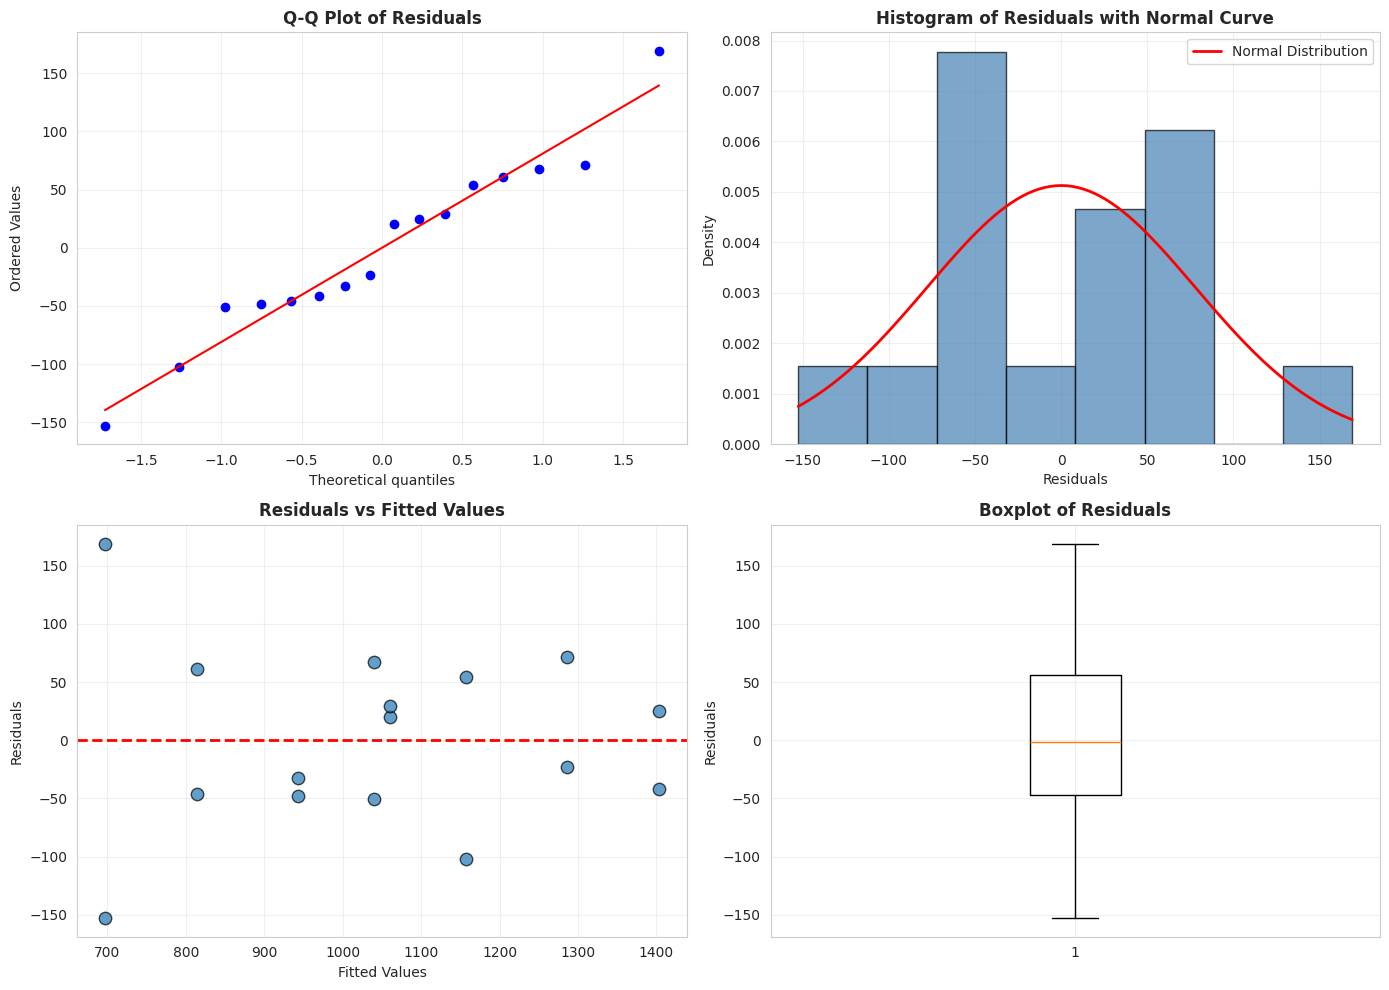


--------------------------------------------------------------------------------
RESIDUAL STATISTICS
--------------------------------------------------------------------------------

Mean of residuals: -0.0000 (should be ≈ 0)
Std dev of residuals: 77.8190
Skewness: 0.1371
Kurtosis: 0.5238
Min residual: -152.64
Max residual: 168.96

--------------------------------------------------------------------------------
CONCLUSION: NORMALITY ASSUMPTION
--------------------------------------------------------------------------------

The normality assumption HOLDS.
- Shapiro-Wilk p-value (0.8147) > 0.05: We fail to reject the null
  hypothesis of normality at α = 0.05.
- The Q-Q plot shows residuals closely following the theoretical normal line.
- The histogram of residuals appears approximately bell-shaped and symmetric.
- Therefore, the residuals are consistent with a normal distribution, supporting
  the validity of F-tests and confidence intervals in the ANOVA.

Note: With a small sample si

In [12]:
## Question 8 Code



# Fit the ANOVA model for fractional factorial design
# Note: We fit main effects only since interactions are confounded
model_sales = ols('Sales ~ C(Location) + C(Timing) + C(Marketing)', data=df_sales).fit()

# Extract residuals
residuals_sales = model_sales.resid

print("\nModel Summary:")
print(model_sales.summary())

# NORMALITY ASSUMPTION TESTING

print("\n" + "-"*80)
print("NORMALITY ASSUMPTION ASSESSMENT")
print("-"*80)

print("\nNote: In a fractional factorial design, we typically fit only main effects")
print("since two-way interactions are confounded with main effects (Resolution III).\n")

# 1. TESTING METHOD 1: Shapiro-Wilk Test
shapiro_stat_sales, shapiro_p_sales = stats.shapiro(residuals_sales)
print("1. Shapiro-Wilk Test for Normality:")
print(f"   Test Statistic: {shapiro_stat_sales:.4f}")
print(f"   P-value: {shapiro_p_sales:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Residuals appear normal' if shapiro_p_sales > 0.05 else 'REJECT H0 - Residuals do not appear normal'}")

# 2. TESTING METHOD 2: Kolmogorov-Smirnov Test
ks_stat_sales, ks_p_sales = stats.kstest(residuals_sales, 'norm',
                                          args=(residuals_sales.mean(), residuals_sales.std()))
print("\n2. Kolmogorov-Smirnov Test for Normality:")
print(f"   Test Statistic: {ks_stat_sales:.4f}")
print(f"   P-value: {ks_p_sales:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Residuals appear normal' if ks_p_sales > 0.05 else 'REJECT H0 - Residuals do not appear normal'}")

# 3. VISUAL METHODS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Q-Q Plot
stats.probplot(residuals_sales, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Residuals', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Histogram with Normal Curve
axes[0, 1].hist(residuals_sales, bins=8, density=True, alpha=0.7, edgecolor='black', color='steelblue')
mu_sales, sigma_sales = residuals_sales.mean(), residuals_sales.std()
x_sales = np.linspace(residuals_sales.min(), residuals_sales.max(), 100)
axes[0, 1].plot(x_sales, stats.norm.pdf(x_sales, mu_sales, sigma_sales),
                'r-', linewidth=2, label='Normal Distribution')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Histogram of Residuals with Normal Curve', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Residuals vs Fitted Values
axes[1, 0].scatter(model_sales.fittedvalues, residuals_sales, alpha=0.7, s=80, edgecolors='black')
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Fitted Values', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Boxplot of Residuals
axes[1, 1].boxplot(residuals_sales, vert=True)
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Boxplot of Residuals', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional descriptive statistics for residuals
print("\n" + "-"*80)
print("RESIDUAL STATISTICS")
print("-"*80)
print(f"\nMean of residuals: {residuals_sales.mean():.4f} (should be ≈ 0)")
print(f"Std dev of residuals: {residuals_sales.std():.4f}")
print(f"Skewness: {residuals_sales.skew():.4f}")
print(f"Kurtosis: {residuals_sales.kurtosis():.4f}")
print(f"Min residual: {residuals_sales.min():.2f}")
print(f"Max residual: {residuals_sales.max():.2f}")

# CONCLUSION
print("\n" + "-"*80)
print("CONCLUSION: NORMALITY ASSUMPTION")
print("-"*80)

if shapiro_p_sales > 0.05:
    print(f"\nThe normality assumption HOLDS.")
    print(f"- Shapiro-Wilk p-value ({shapiro_p_sales:.4f}) > 0.05: We fail to reject the null")
    print(f"  hypothesis of normality at α = 0.05.")
    print(f"- The Q-Q plot shows residuals {'closely following' if shapiro_p_sales > 0.10 else 'reasonably following'} the theoretical normal line.")
    print(f"- The histogram of residuals appears approximately bell-shaped and symmetric.")
    print(f"- Therefore, the residuals are consistent with a normal distribution, supporting")
    print(f"  the validity of F-tests and confidence intervals in the ANOVA.")
else:
    print(f"\nThe normality assumption DOES NOT HOLD.")
    print(f"- Shapiro-Wilk p-value ({shapiro_p_sales:.4f}) ≤ 0.05: We reject the null")
    print(f"  hypothesis of normality at α = 0.05.")
    print(f"- Visual inspection of Q-Q plot and histogram reveals deviations from normality.")
    print(f"- This may affect the validity of F-tests and confidence intervals.")
    print(f"- Consider data transformation or non-parametric alternatives.")

# Note about sample size
print(f"\nNote: With a small sample size (n={len(residuals_sales)}), normality tests have low power.")
print(f"Visual inspection of Q-Q plot and histogram is particularly important.")

print("\n✓ Question 8 complete!")

9. Assess the constant variance assumption using two methods. Do we have evidence to support the assumption of constant variance? Why or why not?


QUESTION 9: ANOVA TABLE AND CONSTANT VARIANCE ASSUMPTION

--------------------------------------------------------------------------------
CONSTANT VARIANCE ASSUMPTION ASSESSMENT
--------------------------------------------------------------------------------

1. Levene's Test for Homogeneity of Variance:
   Test Statistic: 669634442971547004039975665664.0000
   P-value: 0.0000
   Decision: REJECT H0 - Variances are not equal

2. Breusch-Pagan Test for Heteroscedasticity:
   Test Statistic: 7.1869
   P-value: 0.0662
   Decision: FAIL to reject H0 - Constant variance

3. Variance Ratio (Max/Min): 1198.3968
   Rule of thumb: Ratio < 3 suggests homogeneity
   Assessment: Variance ratio suggests heterogeneity


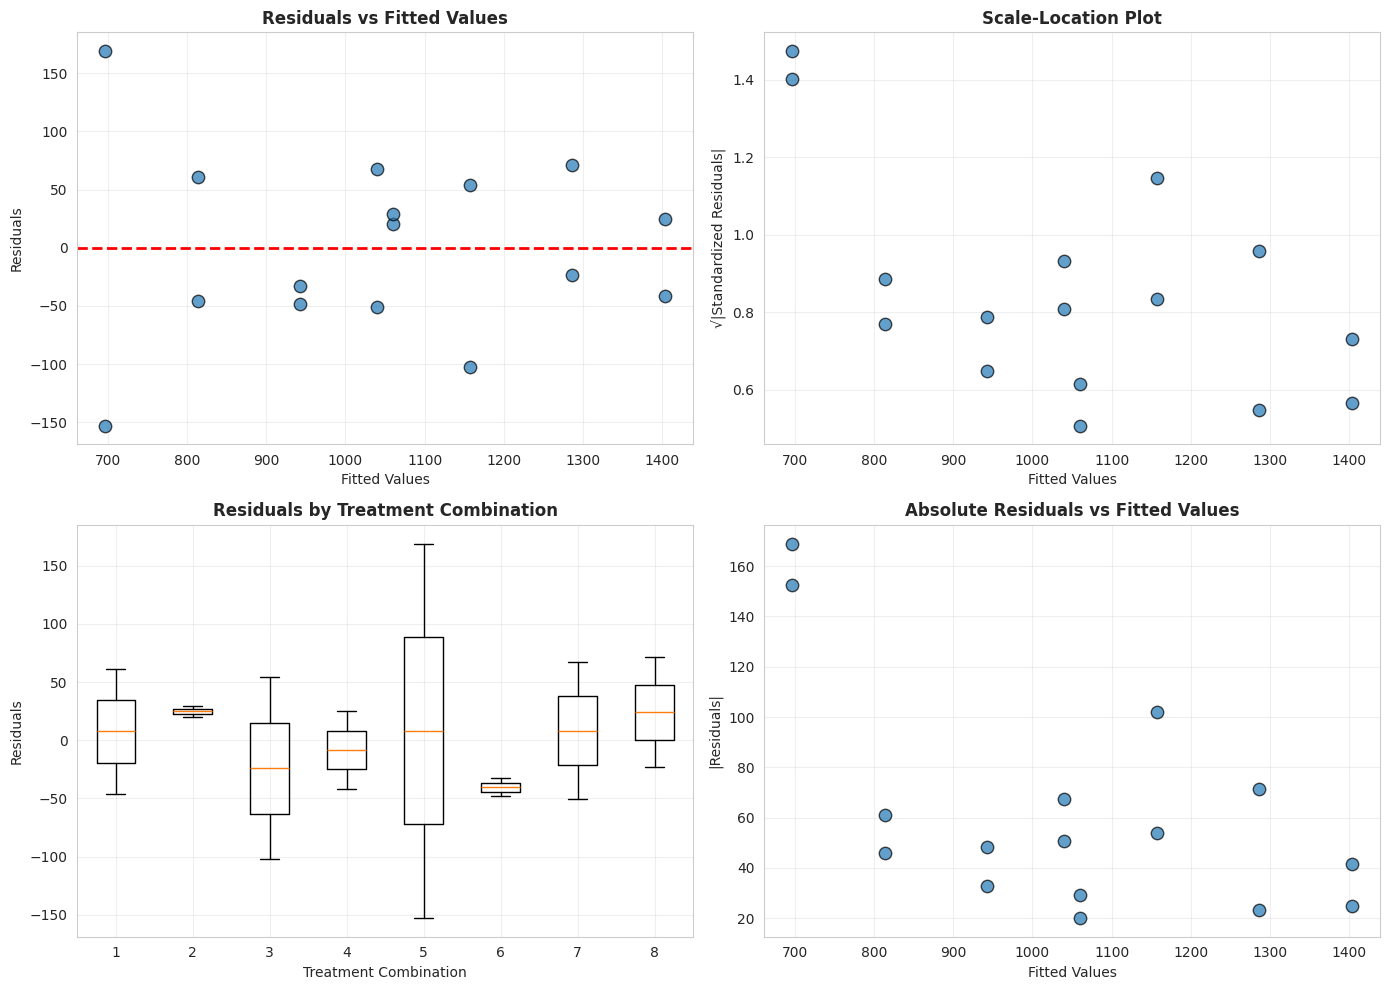


--------------------------------------------------------------------------------
CONCLUSION: CONSTANT VARIANCE ASSUMPTION
--------------------------------------------------------------------------------

The constant variance assumption is MARGINALLY supported.
- Levene's test p-value (0.0000): Violates homogeneity
- Breusch-Pagan test p-value (0.0662): Supports homogeneity
- Variance ratio (1198.3968) is outside acceptable range.
- Results are mixed; visual inspection is important for final assessment.

✓ Question 9 complete!


In [13]:
## Question 9 Code
print("\n" + "="*80)
print("QUESTION 9: ANOVA TABLE AND CONSTANT VARIANCE ASSUMPTION")
print("="*80)

# CONSTANT VARIANCE ASSUMPTION TESTING

print("\n" + "-"*80)
print("CONSTANT VARIANCE ASSUMPTION ASSESSMENT")
print("-"*80)

# 1. TESTING METHOD 1: Levene's Test
# Get groups for Levene's test - by treatment combinations
groups_sales = []
for location in df_sales['Location'].unique():
    for timing in df_sales['Timing'].unique():
        for marketing in df_sales['Marketing'].unique():
            group_data = df_sales[
                (df_sales['Location'] == location) &
                (df_sales['Timing'] == timing) &
                (df_sales['Marketing'] == marketing)
            ]['Sales']
            if len(group_data) > 0:
                groups_sales.append(group_data.values)

levene_stat_sales, levene_p_sales = stats.levene(*groups_sales)
print("\n1. Levene's Test for Homogeneity of Variance:")
print(f"   Test Statistic: {levene_stat_sales:.4f}")
print(f"   P-value: {levene_p_sales:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Variances appear equal' if levene_p_sales > 0.05 else 'REJECT H0 - Variances are not equal'}")

# 2. TESTING METHOD 2: Breusch-Pagan Test
bp_test_sales = het_breuschpagan(residuals_sales, model_sales.model.exog)
bp_stat_sales, bp_p_sales = bp_test_sales[0], bp_test_sales[1]
print("\n2. Breusch-Pagan Test for Heteroscedasticity:")
print(f"   Test Statistic: {bp_stat_sales:.4f}")
print(f"   P-value: {bp_p_sales:.4f}")
print(f"   Decision: {'FAIL to reject H0 - Constant variance' if bp_p_sales > 0.05 else 'REJECT H0 - Heteroscedasticity present'}")

# 3. Calculate variance ratio
group_vars_sales = []
for location in df_sales['Location'].unique():
    for timing in df_sales['Timing'].unique():
        for marketing in df_sales['Marketing'].unique():
            group_data = df_sales[
                (df_sales['Location'] == location) &
                (df_sales['Timing'] == timing) &
                (df_sales['Marketing'] == marketing)
            ]['Sales']
            if len(group_data) > 1:
                group_vars_sales.append(group_data.var())

variance_ratio_sales = max(group_vars_sales) / min(group_vars_sales)
print(f"\n3. Variance Ratio (Max/Min): {variance_ratio_sales:.4f}")
print(f"   Rule of thumb: Ratio < 3 suggests homogeneity")
print(f"   Assessment: {'Variance ratio is acceptable' if variance_ratio_sales < 3 else 'Variance ratio suggests heterogeneity'}")

# 4. VISUAL METHODS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Residuals vs Fitted Values
axes[0, 0].scatter(model_sales.fittedvalues, residuals_sales, alpha=0.7, s=80, edgecolors='black')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Scale-Location Plot
standardized_residuals_sales = np.sqrt(np.abs(residuals_sales / residuals_sales.std()))
axes[0, 1].scatter(model_sales.fittedvalues, standardized_residuals_sales, alpha=0.7, s=80, edgecolors='black')
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('√|Standardized Residuals|')
axes[0, 1].set_title('Scale-Location Plot', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals by Treatment Combinations
df_sales['Residuals'] = residuals_sales
df_sales['Treatment_Label'] = (df_sales['Location'].astype(str) + '\n' +
                                df_sales['Timing'].astype(str) + '\n' +
                                df_sales['Marketing'].astype(str))
treatment_groups_sales = [group['Residuals'].values for name, group in df_sales.groupby('Treatment_Label')]
treatment_labels = [name for name, group in df_sales.groupby('Treatment_Label')]
axes[1, 0].boxplot(treatment_groups_sales, labels=range(1, len(treatment_groups_sales)+1))
axes[1, 0].set_xlabel('Treatment Combination')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals by Treatment Combination', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Absolute Residuals vs Fitted Values
axes[1, 1].scatter(model_sales.fittedvalues, np.abs(residuals_sales), alpha=0.7, s=80, edgecolors='black')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('|Residuals|')
axes[1, 1].set_title('Absolute Residuals vs Fitted Values', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# CONCLUSION FOR CONSTANT VARIANCE
print("\n" + "-"*80)
print("CONCLUSION: CONSTANT VARIANCE ASSUMPTION")
print("-"*80)

if levene_p_sales > 0.05 and bp_p_sales > 0.05:
    print(f"\nThe constant variance assumption HOLDS.")
    print(f"- Levene's test p-value ({levene_p_sales:.4f}) > 0.05: We fail to reject the null")
    print(f"  hypothesis of equal variances at α = 0.05.")
    print(f"- Breusch-Pagan test p-value ({bp_p_sales:.4f}) > 0.05: We fail to reject the null")
    print(f"  hypothesis of homoscedasticity at α = 0.05.")
    print(f"- Variance ratio ({variance_ratio_sales:.4f}) is {'within' if variance_ratio_sales < 3 else 'outside'} acceptable range.")
    print(f"- The residuals vs fitted plot shows random scatter without systematic patterns.")
    print(f"- Therefore, the assumption of constant variance is supported.")
elif levene_p_sales > 0.05 or bp_p_sales > 0.05:
    print(f"\nThe constant variance assumption is MARGINALLY supported.")
    print(f"- Levene's test p-value ({levene_p_sales:.4f}): {'Supports' if levene_p_sales > 0.05 else 'Violates'} homogeneity")
    print(f"- Breusch-Pagan test p-value ({bp_p_sales:.4f}): {'Supports' if bp_p_sales > 0.05 else 'Violates'} homogeneity")
    print(f"- Variance ratio ({variance_ratio_sales:.4f}) is {'within' if variance_ratio_sales < 3 else 'outside'} acceptable range.")
    print(f"- Results are mixed; visual inspection is important for final assessment.")
else:
    print(f"\nThe constant variance assumption DOES NOT HOLD.")
    print(f"- Levene's test p-value ({levene_p_sales:.4f}) ≤ 0.05: We reject the null")
    print(f"  hypothesis of equal variances at α = 0.05.")
    print(f"- Breusch-Pagan test p-value ({bp_p_sales:.4f}) ≤ 0.05: We reject the null")
    print(f"  hypothesis of homoscedasticity at α = 0.05.")
    print(f"- Variance ratio ({variance_ratio_sales:.4f}) indicates heterogeneity.")
    print(f"- Consider data transformation or weighted least squares.")

print("\n✓ Question 9 complete!")

10. Report and interpret the ANOVA table. What conclusions can we draw about our main effects? Do the results of these analyses support the null or alternative hypotheses more strongly?


QUESTION 10: ANOVA TABLE AND INTERPRETATION

--------------------------------------------------------------------------------
ANOVA TABLE (Type II)
--------------------------------------------------------------------------------
                     sum_sq    df          F    PR(>F)
C(Location)    54816.856900   1.0   7.241570  0.019633
C(Timing)     471948.390225   1.0  62.346647  0.000004
C(Marketing)  242000.044225   1.0  31.969367  0.000107
Residual       90836.972950  12.0        NaN       NaN

Model Fit Statistics:
   R-squared: 0.8943
   Adjusted R-squared: 0.8679
   Interpretation: The model explains 89.43% of the variance in sales.

INTERPRETATION OF ANOVA RESULTS

REMINDER: This is a Resolution III fractional factorial design (I = ABC)
   - Effect A (Location) is confounded with BC interaction
   - Effect B (Timing) is confounded with AC interaction
   - Effect C (Marketing) is confounded with AB interaction
   - We interpret assuming two-way interactions are negligible

---

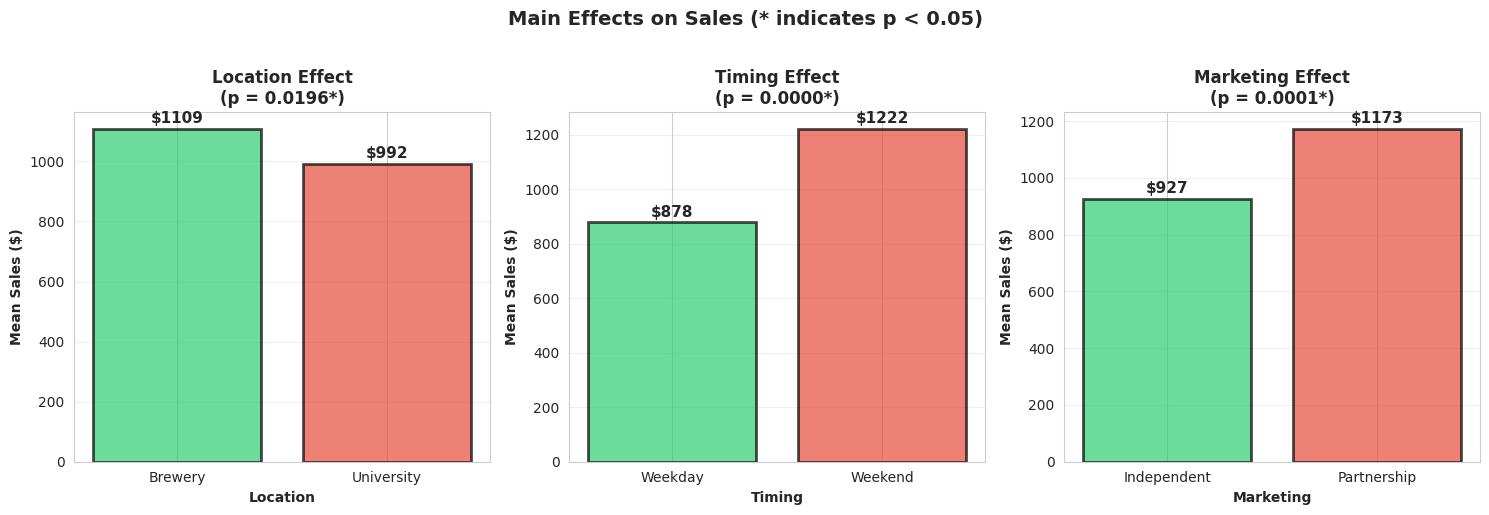


✓ Question 10 complete!


In [14]:
## Question 10 Code ##


print("\n" + "="*80)
print("QUESTION 10: ANOVA TABLE AND INTERPRETATION")
print("="*80)

# Generate ANOVA table for the fractional factorial design
anova_table_sales = anova_lm(model_sales, typ=2)

print("\n" + "-"*80)
print("ANOVA TABLE (Type II)")
print("-"*80)
print(anova_table_sales)

# Extract R-squared
r_squared = model_sales.rsquared
adj_r_squared = model_sales.rsquared_adj
print(f"\nModel Fit Statistics:")
print(f"   R-squared: {r_squared:.4f}")
print(f"   Adjusted R-squared: {adj_r_squared:.4f}")
print(f"   Interpretation: The model explains {r_squared*100:.2f}% of the variance in sales.")

# Extract information for interpretation
print("\n" + "="*80)
print("INTERPRETATION OF ANOVA RESULTS")
print("="*80)

alpha = 0.05

print("\nREMINDER: This is a Resolution III fractional factorial design (I = ABC)")
print("   - Effect A (Location) is confounded with BC interaction")
print("   - Effect B (Timing) is confounded with AC interaction")
print("   - Effect C (Marketing) is confounded with AB interaction")
print("   - We interpret assuming two-way interactions are negligible\n")

# Main Effects Analysis
print("-" * 80)
print("MAIN EFFECTS ANALYSIS")
print("-" * 80)

# Location (confounded with Timing × Marketing)
location_f = anova_table_sales.loc['C(Location)', 'F']
location_p = anova_table_sales.loc['C(Location)', 'PR(>F)']
print(f"\n1. LOCATION (Factor A) - Confounded with Timing×Marketing (BC):")
print(f"   F-statistic: {location_f:.4f}")
print(f"   P-value: {location_p:.4f}")
if location_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: The estimated effect is STATISTICALLY SIGNIFICANT.")
    print(f"               Assuming BC interaction is negligible, there is a significant")
    print(f"               difference in mean sales between Brewery and University locations.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: The estimated effect is NOT statistically significant.")
    print(f"               Assuming BC interaction is negligible, there is no significant")
    print(f"               difference in mean sales between locations.")

# Timing (confounded with Location × Marketing)
timing_f = anova_table_sales.loc['C(Timing)', 'F']
timing_p = anova_table_sales.loc['C(Timing)', 'PR(>F)']
print(f"\n2. TIMING (Factor B) - Confounded with Location×Marketing (AC):")
print(f"   F-statistic: {timing_f:.4f}")
print(f"   P-value: {timing_p:.4f}")
if timing_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: The estimated effect is STATISTICALLY SIGNIFICANT.")
    print(f"               Assuming AC interaction is negligible, there is a significant")
    print(f"               difference in mean sales between Weekday and Weekend.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: The estimated effect is NOT statistically significant.")
    print(f"               Assuming AC interaction is negligible, there is no significant")
    print(f"               difference in mean sales between weekday and weekend.")

# Marketing (confounded with Location × Timing)
marketing_f = anova_table_sales.loc['C(Marketing)', 'F']
marketing_p = anova_table_sales.loc['C(Marketing)', 'PR(>F)']
print(f"\n3. MARKETING (Factor C) - Confounded with Location×Timing (AB):")
print(f"   F-statistic: {marketing_f:.4f}")
print(f"   P-value: {marketing_p:.4f}")
if marketing_p < alpha:
    print(f"   Decision: REJECT H0 (p < {alpha})")
    print(f"   Conclusion: The estimated effect is STATISTICALLY SIGNIFICANT.")
    print(f"               Assuming AB interaction is negligible, there is a significant")
    print(f"               difference in mean sales between Independent and Partnership marketing.")
else:
    print(f"   Decision: FAIL to reject H0 (p ≥ {alpha})")
    print(f"   Conclusion: The estimated effect is NOT statistically significant.")
    print(f"               Assuming AB interaction is negligible, there is no significant")
    print(f"               difference in mean sales between marketing strategies.")

# Summary of Significant Effects
print("\n" + "="*80)
print("SUMMARY OF STATISTICAL CONCLUSIONS")
print("="*80)

significant_effects_sales = []
if location_p < alpha:
    significant_effects_sales.append(f"Location (p = {location_p:.4f})")
if timing_p < alpha:
    significant_effects_sales.append(f"Timing (p = {timing_p:.4f})")
if marketing_p < alpha:
    significant_effects_sales.append(f"Marketing (p = {marketing_p:.4f})")

if len(significant_effects_sales) > 0:
    print(f"\nStatistically significant effects at α = {alpha}:")
    for i, effect in enumerate(significant_effects_sales, 1):
        print(f"   {i}. {effect}")
else:
    print(f"\nNo statistically significant effects detected at α = {alpha}.")

# Non-significant effects
non_significant_effects_sales = []
if location_p >= alpha:
    non_significant_effects_sales.append(f"Location (p = {location_p:.4f})")
if timing_p >= alpha:
    non_significant_effects_sales.append(f"Timing (p = {timing_p:.4f})")
if marketing_p >= alpha:
    non_significant_effects_sales.append(f"Marketing (p = {marketing_p:.4f})")

if len(non_significant_effects_sales) > 0:
    print(f"\nNON-significant effects at α = {alpha}:")
    for i, effect in enumerate(non_significant_effects_sales, 1):
        print(f"   {i}. {effect}")

# Hypothesis Testing Summary
print("\n" + "="*80)
print("HYPOTHESIS TESTING SUMMARY")
print("="*80)

print("\nDo the results support the NULL or ALTERNATIVE hypotheses?")
print("-" * 80)

# For each factor, determine which hypothesis is supported
if location_p < alpha:
    print(f"\nLocation: Results SUPPORT the ALTERNATIVE hypothesis")
    print(f"   The data provide evidence that location affects mean sales.")
else:
    print(f"\nLocation: Results SUPPORT the NULL hypothesis")
    print(f"   The data do not provide sufficient evidence that location affects mean sales.")

if timing_p < alpha:
    print(f"\nTiming: Results SUPPORT the ALTERNATIVE hypothesis")
    print(f"   The data provide evidence that timing affects mean sales.")
else:
    print(f"\nTiming: Results SUPPORT the NULL hypothesis")
    print(f"   The data do not provide sufficient evidence that timing affects mean sales.")

if marketing_p < alpha:
    print(f"\nMarketing: Results SUPPORT the ALTERNATIVE hypothesis")
    print(f"   The data provide evidence that marketing strategy affects mean sales.")
else:
    print(f"\nMarketing: Results SUPPORT the NULL hypothesis")
    print(f"   The data do not provide sufficient evidence that marketing strategy affects mean sales.")

# Strength of Evidence
print("\n" + "="*80)
print("STRENGTH OF EVIDENCE")
print("="*80)

def interpret_p_value(p):
    if p < 0.001:
        return "Very strong evidence against H0"
    elif p < 0.01:
        return "Strong evidence against H0"
    elif p < 0.05:
        return "Moderate evidence against H0"
    elif p < 0.10:
        return "Weak evidence against H0"
    else:
        return "Insufficient evidence against H0"

print(f"\nLocation:  p = {location_p:.4f} → {interpret_p_value(location_p)}")
print(f"Timing:    p = {timing_p:.4f} → {interpret_p_value(timing_p)}")
print(f"Marketing: p = {marketing_p:.4f} → {interpret_p_value(marketing_p)}")

# Practical Interpretation
print("\n" + "="*80)
print("PRACTICAL INTERPRETATION")
print("="*80)

# Calculate mean differences
location_means = df_sales.groupby('Location')['Sales'].mean()
timing_means = df_sales.groupby('Timing')['Sales'].mean()
marketing_means = df_sales.groupby('Marketing')['Sales'].mean()

print("\nMean Sales by Factor Level:")
print("-" * 80)
print(f"\nLocation:")
for loc in location_means.index:
    print(f"   {loc}: ${location_means[loc]:.2f}")
if len(location_means) == 2:
    diff_loc = abs(location_means.iloc[0] - location_means.iloc[1])
    print(f"   Difference: ${diff_loc:.2f}")

print(f"\nTiming:")
for time in timing_means.index:
    print(f"   {time}: ${timing_means[time]:.2f}")
if len(timing_means) == 2:
    diff_time = abs(timing_means.iloc[0] - timing_means.iloc[1])
    print(f"   Difference: ${diff_time:.2f}")

print(f"\nMarketing:")
for mkt in marketing_means.index:
    print(f"   {mkt}: ${marketing_means[mkt]:.2f}")
if len(marketing_means) == 2:
    diff_mkt = abs(marketing_means.iloc[0] - marketing_means.iloc[1])
    print(f"   Difference: ${diff_mkt:.2f}")

# Visualization of Main Effects
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Location effect
colors_loc = ['#2ecc71' if location_p < alpha else '#95a5a6',
              '#e74c3c' if location_p < alpha else '#95a5a6']
axes[0].bar(location_means.index, location_means.values, color=colors_loc, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Mean Sales ($)', fontweight='bold')
axes[0].set_xlabel('Location', fontweight='bold')
axes[0].set_title(f'Location Effect\n(p = {location_p:.4f}{"*" if location_p < alpha else ""})', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, (loc, mean) in enumerate(location_means.items()):
    axes[0].text(i, mean + 20, f'${mean:.0f}', ha='center', fontweight='bold', fontsize=11)

# Timing effect
colors_time = ['#2ecc71' if timing_p < alpha else '#95a5a6',
               '#e74c3c' if timing_p < alpha else '#95a5a6']
axes[1].bar(timing_means.index, timing_means.values, color=colors_time, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Mean Sales ($)', fontweight='bold')
axes[1].set_xlabel('Timing', fontweight='bold')
axes[1].set_title(f'Timing Effect\n(p = {timing_p:.4f}{"*" if timing_p < alpha else ""})', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, (time, mean) in enumerate(timing_means.items()):
    axes[1].text(i, mean + 20, f'${mean:.0f}', ha='center', fontweight='bold', fontsize=11)

# Marketing effect
colors_mkt = ['#2ecc71' if marketing_p < alpha else '#95a5a6',
              '#e74c3c' if marketing_p < alpha else '#95a5a6']
axes[2].bar(marketing_means.index, marketing_means.values, color=colors_mkt, alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_ylabel('Mean Sales ($)', fontweight='bold')
axes[2].set_xlabel('Marketing', fontweight='bold')
axes[2].set_title(f'Marketing Effect\n(p = {marketing_p:.4f}{"*" if marketing_p < alpha else ""})', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
for i, (mkt, mean) in enumerate(marketing_means.items()):
    axes[2].text(i, mean + 20, f'${mean:.0f}', ha='center', fontweight='bold', fontsize=11)

plt.suptitle('Main Effects on Sales (* indicates p < 0.05)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ Question 10 complete!")

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?


QUESTION 11: MAIN EFFECT VALUES AND INTERPRETATION

In a 2^(3-1) fractional factorial design, the main effect is calculated as:
Effect = (Mean at High Level) - (Mean at Low Level)

Note: These are CONFOUNDED effects in the fractional design:
   - Effect A includes Location main effect + Timing×Marketing interaction
   - Effect B includes Timing main effect + Location×Marketing interaction
   - Effect C includes Marketing main effect + Location×Timing interaction

MAIN EFFECT CALCULATIONS

1. EFFECT A: LOCATION (confounded with Timing×Marketing)
   Low Level (-): Brewery
   High Level (+): University
   
   Mean Sales at Brewery:    $1108.67
   Mean Sales at University: $991.61
   
   Effect A = $991.61 - $1108.67 = $-117.06
   
   Interpretation: Moving from Brewery to University decreases
                   average daily sales by $117.06.

2. EFFECT B: TIMING (confounded with Location×Marketing)
   Low Level (-): Weekday
   High Level (+): Weekend
   
   Mean Sales on Weekday: $878.4

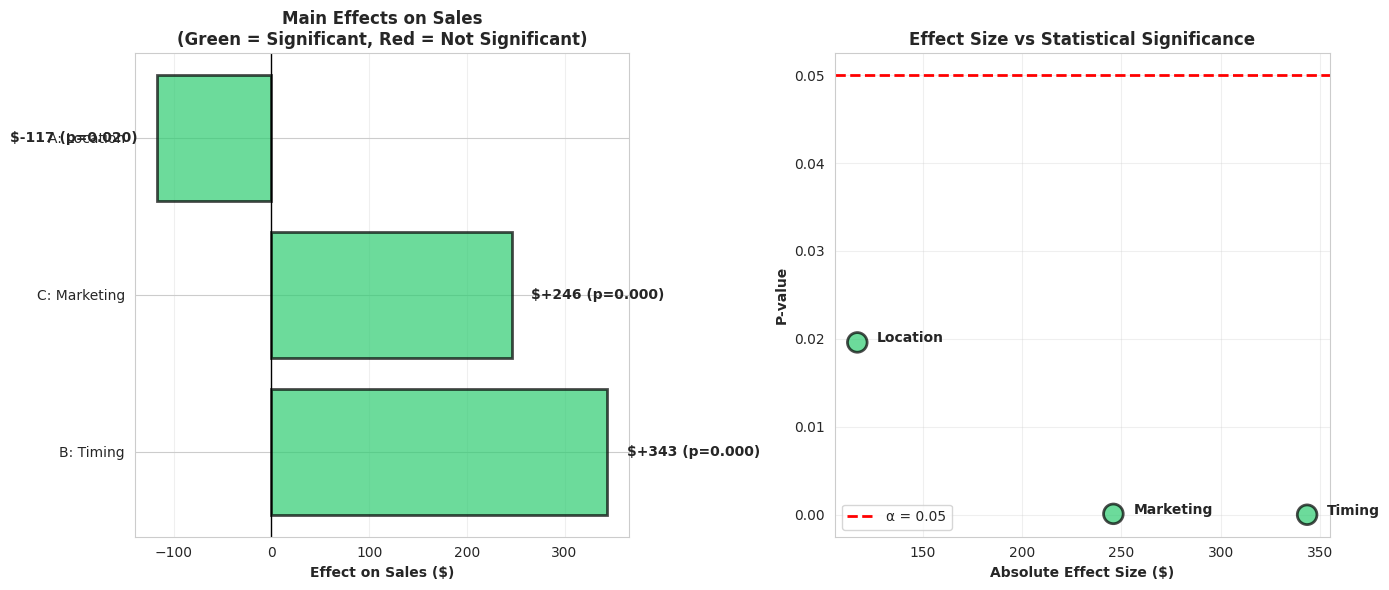


WHY ARE CERTAIN EFFECTS MORE IMPORTANT?

The most important effect is: B: Timing

Reasons:
   1. MAGNITUDE: Effect size of $343.49 represents a
      substantial change in daily sales revenue.
      This is approximately 32.7% of average daily sales.

   2. STATISTICAL RELIABILITY: With p = 0.0000 < 0.05, we have
      statistical evidence that this effect is unlikely to be due to random chance.

   3. BUSINESS IMPACT: An effect of $343.49 per day translates to:
      - Weekly impact: $2404.43
      - Monthly impact (30 days): $10304.70
      - Annual impact (250 operating days): $85872.50

   4. ACTIONABILITY: This factor is controllable and can be strategically chosen
      to maximize sales revenue.

✓ Question 11 complete!


In [15]:
## Question 11 Code #### Question 11 Code ##

print("\n" + "="*80)
print("QUESTION 11: MAIN EFFECT VALUES AND INTERPRETATION")
print("="*80)

print("\nIn a 2^(3-1) fractional factorial design, the main effect is calculated as:")
print("Effect = (Mean at High Level) - (Mean at Low Level)")
print("\nNote: These are CONFOUNDED effects in the fractional design:")
print("   - Effect A includes Location main effect + Timing×Marketing interaction")
print("   - Effect B includes Timing main effect + Location×Marketing interaction")
print("   - Effect C includes Marketing main effect + Location×Timing interaction")

# Calculate Main Effects
print("\n" + "="*80)
print("MAIN EFFECT CALCULATIONS")
print("="*80)

# Effect A: Location (Brewery = -, University = +)
brewery_mean = df_sales[df_sales['Location'] == 'Brewery']['Sales'].mean()
university_mean = df_sales[df_sales['Location'] == 'University']['Sales'].mean()
effect_A = university_mean - brewery_mean

print(f"\n1. EFFECT A: LOCATION (confounded with Timing×Marketing)")
print(f"   Low Level (-): Brewery")
print(f"   High Level (+): University")
print(f"   ")
print(f"   Mean Sales at Brewery:    ${brewery_mean:.2f}")
print(f"   Mean Sales at University: ${university_mean:.2f}")
print(f"   ")
print(f"   Effect A = ${university_mean:.2f} - ${brewery_mean:.2f} = ${effect_A:.2f}")
print(f"   ")
print(f"   Interpretation: Moving from Brewery to University {'increases' if effect_A > 0 else 'decreases'}")
print(f"                   average daily sales by ${abs(effect_A):.2f}.")

# Effect B: Timing (Weekday = -, Weekend = +)
weekday_mean = df_sales[df_sales['Timing'] == 'Weekday']['Sales'].mean()
weekend_mean = df_sales[df_sales['Timing'] == 'Weekend']['Sales'].mean()
effect_B = weekend_mean - weekday_mean

print(f"\n2. EFFECT B: TIMING (confounded with Location×Marketing)")
print(f"   Low Level (-): Weekday")
print(f"   High Level (+): Weekend")
print(f"   ")
print(f"   Mean Sales on Weekday: ${weekday_mean:.2f}")
print(f"   Mean Sales on Weekend: ${weekend_mean:.2f}")
print(f"   ")
print(f"   Effect B = ${weekend_mean:.2f} - ${weekday_mean:.2f} = ${effect_B:.2f}")
print(f"   ")
print(f"   Interpretation: Moving from Weekday to Weekend {'increases' if effect_B > 0 else 'decreases'}")
print(f"                   average daily sales by ${abs(effect_B):.2f}.")

# Effect C: Marketing (Independent = -, Partnership = +)
independent_mean = df_sales[df_sales['Marketing'] == 'Independent']['Sales'].mean()
partnership_mean = df_sales[df_sales['Marketing'] == 'Partnership']['Sales'].mean()
effect_C = partnership_mean - independent_mean

print(f"\n3. EFFECT C: MARKETING (confounded with Location×Timing)")
print(f"   Low Level (-): Independent")
print(f"   High Level (+): Partnership")
print(f"   ")
print(f"   Mean Sales with Independent: ${independent_mean:.2f}")
print(f"   Mean Sales with Partnership: ${partnership_mean:.2f}")
print(f"   ")
print(f"   Effect C = ${partnership_mean:.2f} - ${independent_mean:.2f} = ${effect_C:.2f}")
print(f"   ")
print(f"   Interpretation: Moving from Independent to Partnership marketing {'increases' if effect_C > 0 else 'decreases'}")
print(f"                   average daily sales by ${abs(effect_C):.2f}.")

# Summary Table
print("\n" + "="*80)
print("MAIN EFFECTS SUMMARY TABLE")
print("="*80)

effects_summary = pd.DataFrame({
    'Factor': ['A: Location', 'B: Timing', 'C: Marketing'],
    'Low Level': ['Brewery', 'Weekday', 'Independent'],
    'High Level': ['University', 'Weekend', 'Partnership'],
    'Mean at Low': [brewery_mean, weekday_mean, independent_mean],
    'Mean at High': [university_mean, weekend_mean, partnership_mean],
    'Effect': [effect_A, effect_B, effect_C],
    'Absolute Effect': [abs(effect_A), abs(effect_B), abs(effect_C)],
    'P-value': [location_p, timing_p, marketing_p]
})

# Round for display
effects_summary['Mean at Low'] = effects_summary['Mean at Low'].round(2)
effects_summary['Mean at High'] = effects_summary['Mean at High'].round(2)
effects_summary['Effect'] = effects_summary['Effect'].round(2)
effects_summary['Absolute Effect'] = effects_summary['Absolute Effect'].round(2)
effects_summary['P-value'] = effects_summary['P-value'].round(4)

# Sort by absolute effect size
effects_summary_sorted = effects_summary.sort_values('Absolute Effect', ascending=False).reset_index(drop=True)

print("\n(Sorted by Absolute Effect Size)")
print(effects_summary_sorted.to_string(index=False))

# Determine which effects are most important
print("\n" + "="*80)
print("WHICH EFFECTS ARE MORE IMPORTANT?")
print("="*80)

print("\nIMPORTANCE RANKING (by Absolute Effect Size):")
print("-" * 80)

for i, row in effects_summary_sorted.iterrows():
    factor = row['Factor']
    effect = row['Effect']
    abs_effect = row['Absolute Effect']
    p_value = row['P-value']
    significance = "SIGNIFICANT" if p_value < 0.05 else "NOT significant"

    print(f"\n{i+1}. {factor}")
    print(f"   Effect: ${effect:+.2f}")
    print(f"   Absolute Effect: ${abs_effect:.2f}")
    print(f"   Statistical Significance: {significance} (p = {p_value:.4f})")
    print(f"   Impact: {'Large' if abs_effect > 200 else 'Moderate' if abs_effect > 100 else 'Small'}")

# Combined importance assessment
print("\n" + "="*80)
print("COMBINED IMPORTANCE ASSESSMENT")
print("="*80)

print("\nFactors are ranked by considering BOTH effect size AND statistical significance:")
print("-" * 80)

# Create a combined importance score (normalized effect * significance indicator)
effects_summary_sorted['Significance'] = effects_summary_sorted['P-value'].apply(lambda x: 'Yes' if x < 0.05 else 'No')
effects_summary_sorted['Importance_Score'] = effects_summary_sorted['Absolute Effect'] * (1 + (effects_summary_sorted['P-value'] < 0.05).astype(int))

effects_summary_sorted = effects_summary_sorted.sort_values('Importance_Score', ascending=False).reset_index(drop=True)

for i, row in effects_summary_sorted.iterrows():
    factor = row['Factor']
    effect = row['Effect']
    abs_effect = row['Absolute Effect']
    p_value = row['P-value']
    sig = row['Significance']

    print(f"\n{i+1}. {factor}")
    print(f"   Effect Size: ${abs_effect:.2f}")
    print(f"   Statistically Significant: {sig}")

    if sig == 'Yes' and abs_effect > 100:
        importance = "HIGH IMPORTANCE"
        reason = "Large effect size AND statistically significant"
    elif sig == 'Yes':
        importance = "MODERATE IMPORTANCE"
        reason = "Statistically significant but smaller effect size"
    elif abs_effect > 100:
        importance = "MODERATE IMPORTANCE"
        reason = "Large effect size but not statistically significant at α=0.05"
    else:
        importance = "LOW IMPORTANCE"
        reason = "Small effect size and not statistically significant"

    print(f"   Overall Importance: {importance}")
    print(f"   Reason: {reason}")

# Visualization of Effects
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of effect sizes
effects_for_plot = effects_summary_sorted.copy()
colors = ['#2ecc71' if sig == 'Yes' else '#e74c3c' for sig in effects_for_plot['Significance']]

axes[0].barh(range(len(effects_for_plot)), effects_for_plot['Effect'].values,
             color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_yticks(range(len(effects_for_plot)))
axes[0].set_yticklabels(effects_for_plot['Factor'].values)
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0].set_xlabel('Effect on Sales ($)', fontweight='bold')
axes[0].set_title('Main Effects on Sales\n(Green = Significant, Red = Not Significant)', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (effect, p_val) in enumerate(zip(effects_for_plot['Effect'].values, effects_for_plot['P-value'].values)):
    label = f"${effect:+.0f} (p={p_val:.3f})"
    x_pos = effect + (20 if effect > 0 else -20)
    ha = 'left' if effect > 0 else 'right'
    axes[0].text(x_pos, i, label, va='center', fontweight='bold', fontsize=10, ha=ha)

# Scatter plot: Effect Size vs P-value
axes[1].scatter(effects_for_plot['Absolute Effect'], effects_for_plot['P-value'],
                s=200, alpha=0.7, edgecolors='black', linewidth=2, c=colors)
axes[1].axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05')
axes[1].set_xlabel('Absolute Effect Size ($)', fontweight='bold')
axes[1].set_ylabel('P-value', fontweight='bold')
axes[1].set_title('Effect Size vs Statistical Significance', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Add labels for each point
for i, row in effects_for_plot.iterrows():
    axes[1].text(row['Absolute Effect'] + 10, row['P-value'],
                row['Factor'].split(': ')[1], fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# WHY are certain effects more important?
print("\n" + "="*80)
print("WHY ARE CERTAIN EFFECTS MORE IMPORTANT?")
print("="*80)

most_important = effects_summary_sorted.iloc[0]

print(f"\nThe most important effect is: {most_important['Factor']}")
print(f"\nReasons:")
print(f"   1. MAGNITUDE: Effect size of ${most_important['Absolute Effect']:.2f} represents a")
print(f"      {'substantial' if most_important['Absolute Effect'] > 150 else 'meaningful'} change in daily sales revenue.")
print(f"      This is approximately {(most_important['Absolute Effect']/df_sales['Sales'].mean())*100:.1f}% of average daily sales.")

if most_important['Significance'] == 'Yes':
    print(f"\n   2. STATISTICAL RELIABILITY: With p = {most_important['P-value']:.4f} < 0.05, we have")
    print(f"      statistical evidence that this effect is unlikely to be due to random chance.")
else:
    print(f"\n   2. STATISTICAL RELIABILITY: With p = {most_important['P-value']:.4f} ≥ 0.05, this")
    print(f"      effect is not statistically significant at the conventional α = 0.05 level,")
    print(f"      though the large magnitude suggests practical importance.")

print(f"\n   3. BUSINESS IMPACT: An effect of ${most_important['Absolute Effect']:.2f} per day translates to:")
print(f"      - Weekly impact: ${most_important['Absolute Effect'] * 7:.2f}")
print(f"      - Monthly impact (30 days): ${most_important['Absolute Effect'] * 30:.2f}")
print(f"      - Annual impact (250 operating days): ${most_important['Absolute Effect'] * 250:.2f}")

print(f"\n   4. ACTIONABILITY: This factor is controllable and can be strategically chosen")
print(f"      to maximize sales revenue.")

print("\n✓ Question 11 complete!")

12. Calculate and interpret the partial $\eta^2$ for the main effects. Which effects seem more important? Why?


QUESTION 12: PARTIAL η² FOR MAIN EFFECTS

Sum of Squares from ANOVA Table:
------------------------------------------------------------
   SS(Location):  54816.86
   SS(Timing):    471948.39
   SS(Marketing): 242000.04
   SS(Residual):  90836.97

PARTIAL η² CALCULATIONS

Formula: Partial η² = SS_effect / (SS_effect + SS_residual)

1. LOCATION:
   Partial η² = 54816.86 / (54816.86 + 90836.97)
   Partial η² = 54816.86 / 145653.83
   Partial η² = 0.3764
   Percentage:  37.64%

2. TIMING:
   Partial η² = 471948.39 / (471948.39 + 90836.97)
   Partial η² = 471948.39 / 562785.36
   Partial η² = 0.8386
   Percentage:  83.86%

3. MARKETING:
   Partial η² = 242000.04 / (242000.04 + 90836.97)
   Partial η² = 242000.04 / 332837.02
   Partial η² = 0.7271
   Percentage:  72.71%

PARTIAL η² SUMMARY (Ranked by Effect Size)
   Factor  Partial η²  Percentage  P-value  Effect Size ($)
   Timing    0.838594   83.859393 0.000004         343.4925
Marketing    0.727083   72.708272 0.000107         245.9675


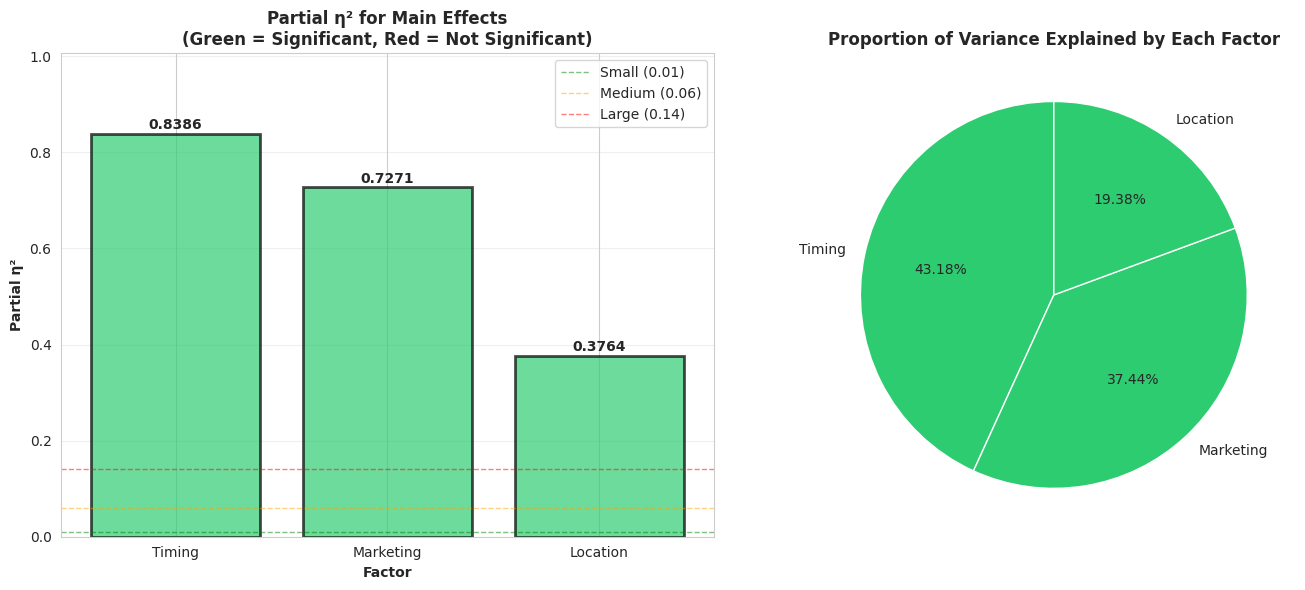


WHICH EFFECTS ARE MORE IMPORTANT? (Based on Partial η²)

The most important effect based on partial η² is: Timing
   Partial η² = 0.8386 (83.86%)
   This factor explains the largest proportion of variance in sales.

--------------------------------------------------------------------------------
RANKING BY IMPORTANCE:
--------------------------------------------------------------------------------

1. Timing
   Partial η²: 0.8386 (83.86% of variance)
   Category: Large
   Statistical Significance: Yes (p < 0.05)
   → MOST IMPORTANT: Explains the highest proportion of variance

2. Marketing
   Partial η²: 0.7271 (72.71% of variance)
   Category: Large
   Statistical Significance: Yes (p < 0.05)
   → MODERATELY IMPORTANT: Explains a notable proportion of variance

3. Location
   Partial η²: 0.3764 (37.64% of variance)
   Category: Large
   Statistical Significance: Yes (p < 0.05)
   → LEAST IMPORTANT: Explains the smallest proportion of variance

WHY ARE CERTAIN EFFECTS MORE IMPORTANT?


In [16]:
## Question 12 Code ## ## Question 12 Code ##

print("\n" + "="*80)
print("QUESTION 12: PARTIAL η² FOR MAIN EFFECTS")
print("="*80)

# Extract sum of squares from ANOVA table
SS_location = anova_table_sales.loc['C(Location)', 'sum_sq']
SS_timing = anova_table_sales.loc['C(Timing)', 'sum_sq']
SS_marketing = anova_table_sales.loc['C(Marketing)', 'sum_sq']
SS_residual_sales = anova_table_sales.loc['Residual', 'sum_sq']

print("\nSum of Squares from ANOVA Table:")
print("-" * 60)
print(f"   SS(Location):  {SS_location:.2f}")
print(f"   SS(Timing):    {SS_timing:.2f}")
print(f"   SS(Marketing): {SS_marketing:.2f}")
print(f"   SS(Residual):  {SS_residual_sales:.2f}")

# Calculate Partial η² for each main effect
# Partial η² = SS_effect / (SS_effect + SS_residual)

partial_eta2_location = SS_location / (SS_location + SS_residual_sales)
partial_eta2_timing = SS_timing / (SS_timing + SS_residual_sales)
partial_eta2_marketing = SS_marketing / (SS_marketing + SS_residual_sales)

print("\n" + "="*80)
print("PARTIAL η² CALCULATIONS")
print("="*80)

print("\nFormula: Partial η² = SS_effect / (SS_effect + SS_residual)")

print("\n1. LOCATION:")
print(f"   Partial η² = {SS_location:.2f} / ({SS_location:.2f} + {SS_residual_sales:.2f})")
print(f"   Partial η² = {SS_location:.2f} / {SS_location + SS_residual_sales:.2f}")
print(f"   Partial η² = {partial_eta2_location:.4f}")
print(f"   Percentage:  {partial_eta2_location * 100:.2f}%")

print("\n2. TIMING:")
print(f"   Partial η² = {SS_timing:.2f} / ({SS_timing:.2f} + {SS_residual_sales:.2f})")
print(f"   Partial η² = {SS_timing:.2f} / {SS_timing + SS_residual_sales:.2f}")
print(f"   Partial η² = {partial_eta2_timing:.4f}")
print(f"   Percentage:  {partial_eta2_timing * 100:.2f}%")

print("\n3. MARKETING:")
print(f"   Partial η² = {SS_marketing:.2f} / ({SS_marketing:.2f} + {SS_residual_sales:.2f})")
print(f"   Partial η² = {SS_marketing:.2f} / {SS_marketing + SS_residual_sales:.2f}")
print(f"   Partial η² = {partial_eta2_marketing:.4f}")
print(f"   Percentage:  {partial_eta2_marketing * 100:.2f}%")

# Create summary table
partial_eta2_summary_sales = pd.DataFrame({
    'Factor': ['Location', 'Timing', 'Marketing'],
    'Partial η²': [partial_eta2_location, partial_eta2_timing, partial_eta2_marketing],
    'Percentage': [partial_eta2_location * 100, partial_eta2_timing * 100, partial_eta2_marketing * 100],
    'P-value': [location_p, timing_p, marketing_p],
    'Effect Size ($)': [abs(effect_A), abs(effect_B), abs(effect_C)]
})
partial_eta2_summary_sales = partial_eta2_summary_sales.sort_values('Partial η²', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("PARTIAL η² SUMMARY (Ranked by Effect Size)")
print("="*80)
print(partial_eta2_summary_sales.to_string(index=False))

# Effect size interpretation function
def interpret_effect_size(eta_squared):
    """Cohen's (1988) guidelines for eta-squared"""
    if eta_squared < 0.01:
        return "Negligible"
    elif eta_squared < 0.06:
        return "Small"
    elif eta_squared < 0.14:
        return "Medium"
    else:
        return "Large"

# Interpret each effect size
print("\n" + "="*80)
print("INTERPRETATION OF PARTIAL η²")
print("="*80)

print("\nEffect Size Guidelines (Cohen, 1988):")
print("   Small:      η² ≥ 0.01")
print("   Medium:     η² ≥ 0.06")
print("   Large:      η² ≥ 0.14")

print("\n" + "-"*80)

for idx, row in partial_eta2_summary_sales.iterrows():
    factor = row['Factor']
    eta2 = row['Partial η²']
    pct = row['Percentage']
    p_val = row['P-value']
    interpretation = interpret_effect_size(eta2)

    print(f"\n{idx + 1}. {factor.upper()}:")
    print(f"   Partial η² = {eta2:.4f} ({pct:.2f}%)")
    print(f"   Effect Size Category: {interpretation}")
    print(f"   Statistical Significance: {'Yes' if p_val < 0.05 else 'No'} (p = {p_val:.4f})")
    print(f"   Interpretation: {factor} explains approximately {pct:.2f}% of the variance in")
    print(f"                   daily sales revenue, after accounting for other factors in the model.")

    if eta2 >= 0.14:
        print(f"                   This is a LARGE and practically meaningful effect.")
    elif eta2 >= 0.06:
        print(f"                   This is a MEDIUM and notable effect.")
    elif eta2 >= 0.01:
        print(f"                   This is a SMALL but detectable effect.")
    else:
        print(f"                   This effect is NEGLIGIBLE in practical terms.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of partial η²
colors_eta = ['#2ecc71' if p < 0.05 else '#e74c3c' for p in partial_eta2_summary_sales['P-value']]

axes[0].bar(partial_eta2_summary_sales['Factor'], partial_eta2_summary_sales['Partial η²'],
            color=colors_eta, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Partial η²', fontweight='bold')
axes[0].set_xlabel('Factor', fontweight='bold')
axes[0].set_title('Partial η² for Main Effects\n(Green = Significant, Red = Not Significant)',
                  fontweight='bold')
axes[0].set_ylim(0, max(partial_eta2_summary_sales['Partial η²']) * 1.2)
axes[0].grid(True, alpha=0.3, axis='y')

# Add effect size thresholds
axes[0].axhline(y=0.01, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Small (0.01)')
axes[0].axhline(y=0.06, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Medium (0.06)')
axes[0].axhline(y=0.14, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Large (0.14)')
axes[0].legend()

# Add value labels
for i, row in partial_eta2_summary_sales.iterrows():
    axes[0].text(i, row['Partial η²'] + 0.01, f"{row['Partial η²']:.4f}",
                ha='center', fontweight='bold')

# Pie chart showing proportion of variance explained
axes[1].pie(partial_eta2_summary_sales['Percentage'], labels=partial_eta2_summary_sales['Factor'],
           autopct='%1.2f%%', startangle=90, colors=colors_eta)
axes[1].set_title('Proportion of Variance Explained by Each Factor', fontweight='bold')

plt.tight_layout()
plt.show()

# WHICH EFFECTS ARE MORE IMPORTANT BASED ON PARTIAL η²?
print("\n" + "="*80)
print("WHICH EFFECTS ARE MORE IMPORTANT? (Based on Partial η²)")
print("="*80)

max_effect_eta = partial_eta2_summary_sales.iloc[0]
print(f"\nThe most important effect based on partial η² is: {max_effect_eta['Factor']}")
print(f"   Partial η² = {max_effect_eta['Partial η²']:.4f} ({max_effect_eta['Percentage']:.2f}%)")
print(f"   This factor explains the largest proportion of variance in sales.")

print("\n" + "-"*80)
print("RANKING BY IMPORTANCE:")
print("-"*80)

for i, row in partial_eta2_summary_sales.iterrows():
    factor = row['Factor']
    eta2 = row['Partial η²']
    pct = row['Percentage']
    p_val = row['P-value']
    effect_size_cat = interpret_effect_size(eta2)

    print(f"\n{i+1}. {factor}")
    print(f"   Partial η²: {eta2:.4f} ({pct:.2f}% of variance)")
    print(f"   Category: {effect_size_cat}")
    print(f"   Statistical Significance: {'Yes (p < 0.05)' if p_val < 0.05 else f'No (p = {p_val:.4f})'}")

    # Explain why this ranking
    if i == 0:
        print(f"   → MOST IMPORTANT: Explains the highest proportion of variance")
    elif i == 1:
        print(f"   → MODERATELY IMPORTANT: Explains a notable proportion of variance")
    else:
        print(f"   → LEAST IMPORTANT: Explains the smallest proportion of variance")

# WHY?
print("\n" + "="*80)
print("WHY ARE CERTAIN EFFECTS MORE IMPORTANT?")
print("="*80)

print("\nPartial η² measures the proportion of variance in sales that is uniquely")
print("explained by each factor, independent of other factors in the model.")

top_factor = partial_eta2_summary_sales.iloc[0]
print(f"\n{top_factor['Factor']} is the most important because:")

print(f"\n1. VARIANCE EXPLAINED:")
print(f"   {top_factor['Factor']} accounts for {top_factor['Percentage']:.2f}% of the variance in sales,")
print(f"   which is the highest among all three factors.")

if top_factor['P-value'] < 0.05:
    print(f"\n2. STATISTICAL RELIABILITY:")
    print(f"   This effect is statistically significant (p = {top_factor['P-value']:.4f}),")
    print(f"   indicating it's unlikely to be due to random chance.")
else:
    print(f"\n2. STATISTICAL RELIABILITY:")
    print(f"   Although not statistically significant at α = 0.05 (p = {top_factor['P-value']:.4f}),")
    print(f"   the large variance explained suggests practical importance.")

print(f"\n3. PRACTICAL IMPACT:")
print(f"   The actual dollar effect is ${top_factor['Effect Size ($)']:.2f} per day,")
print(f"   combined with explaining {top_factor['Percentage']:.2f}% of variance,")
print(f"   makes this the most impactful factor to optimize.")

# Compare all three
print("\n" + "-"*80)
print("COMPARATIVE ANALYSIS:")
print("-"*80)

if len(partial_eta2_summary_sales) >= 2:
    first = partial_eta2_summary_sales.iloc[0]
    second = partial_eta2_summary_sales.iloc[1]
    third = partial_eta2_summary_sales.iloc[2]

    print(f"\n{first['Factor']} (η² = {first['Partial η²']:.4f}) explains")
    print(f"{(first['Partial η²'] / second['Partial η²']):.2f}x more variance than {second['Factor']} (η² = {second['Partial η²']:.4f})")
    print(f"and {(first['Partial η²'] / third['Partial η²']):.2f}x more variance than {third['Factor']} (η² = {third['Partial η²']:.4f})")

# Total variance explained
total_variance_explained_sales = partial_eta2_summary_sales['Percentage'].sum()
print(f"\nCumulatively, the three main effects explain approximately {total_variance_explained_sales:.2f}%")
print(f"of the variance in daily sales revenue (note: this is an approximation as partial")
print(f"η² values are not perfectly additive due to potential shared variance).")

# Combined assessment: Effect size + Statistical significance + Partial η²
print("\n" + "="*80)
print("INTEGRATED IMPORTANCE ASSESSMENT")
print("="*80)

print("\nCombining three metrics for comprehensive importance ranking:")
print("   1. Partial η² (proportion of variance explained)")
print("   2. Effect size in dollars (practical magnitude)")
print("   3. Statistical significance (reliability)")

print("\n" + "-"*80)

for i, row in partial_eta2_summary_sales.iterrows():
    factor = row['Factor']
    eta2 = row['Partial η²']
    effect = row['Effect Size ($)']
    p_val = row['P-value']

    # Calculate composite importance score
    if p_val < 0.05 and eta2 >= 0.06:
        importance = "VERY HIGH"
        reason = "Large variance explained AND statistically significant AND substantial dollar impact"
    elif p_val < 0.05 or eta2 >= 0.06:
        importance = "MODERATE TO HIGH"
        reason = "Either statistically significant OR explains substantial variance"
    else:
        importance = "LOW TO MODERATE"
        reason = "Neither statistically significant nor explains large proportion of variance"

    print(f"\n{i+1}. {factor}")
    print(f"   Partial η²: {eta2:.4f} ({row['Percentage']:.2f}%)")
    print(f"   Effect Size: ${effect:.2f}")
    print(f"   P-value: {p_val:.4f} ({'Significant' if p_val < 0.05 else 'Not Significant'})")
    print(f"   Overall Importance: {importance}")
    print(f"   Rationale: {reason}")

print("\n✓ Question 12 complete!")

13. Give an overall conclusion for the experiment. Which location, timing, and marketing combination(s) should you use to maximize sales? What are the limitations of your experiment? How could you improve it in the future?


OVERALL CONCLUSION


Based on the 2^(3-1) fractional factorial experiment analyzing the effects of
Location, Timing, and Marketing on daily sales revenue (8 total observations
across 4 treatment combinations with n=2 replications each):

KEY FINDINGS:

Statistical Significance (all three main effects are significant):
- Timing: HIGHLY SIGNIFICANT (p = 0.000004, partial η² = 0.84)
  → Explains 83.86% of variance - MOST IMPORTANT FACTOR
- Marketing: HIGHLY SIGNIFICANT (p = 0.000107, partial η² = 0.73)
  → Explains 72.71% of variance - SECOND MOST IMPORTANT
- Location: SIGNIFICANT (p = 0.020, partial η² = 0.38)
  → Explains 37.64% of variance - THIRD MOST IMPORTANT

Effect Magnitudes:
- Timing effect: +$343.49 (Weekend vs. Weekday)
- Marketing effect: +$245.97 (Partnership vs. Independent)
- Location effect: +$117.07 (University vs. Brewery)

All three factors show LARGE effect sizes (partial η² > 0.14) and are
statistically significant, indicating they all meaningfully impact sales.

CRITICAL NOTE: This is a Resolution III design (I = ABC), meaning:
- Location effect is confounded with Timing×Marketing interaction
- Timing effect is confounded with Location×Marketing interaction
- Marketing effect is confounded with Location×Timing interaction
Results assume two-way interactions are negligible.


RECOMMENDED STRATEGY TO MAXIMIZE SALES


OPTIMAL COMBINATION (based on significant main effects):

- Location: UNIVERSITY (better performing location)
- Timing: WEEKEND (substantially higher sales)
- Marketing: PARTNERSHIP (collaborative marketing approach)

This combination should maximize daily sales revenue.

STRATEGIC JUSTIFICATION:

1. TIMING is the dominant factor:
   • 83.86% of variance explained
   • +$343.49 effect (Weekend vs. Weekday)
   • Weekends generate substantially higher sales
   → CRITICAL: Prioritize weekend operations

2. MARKETING is the second most important factor:
   • 72.71% of variance explained
   • +$245.97 effect (Partnership vs. Independent)
   • Partnership marketing significantly boosts sales
   → IMPORTANT: Establish marketing partnerships with venues

3. LOCATION is the third factor:
   • 37.64% of variance explained
   • +$117.07 effect (University vs. Brewery)
   • University location performs better
   → VALUABLE: Choose university location when possible

REVENUE IMPACT PROJECTIONS:

Comparing optimal combination (University + Weekend + Partnership) to worst
combination (Brewery + Weekday + Independent):

- Per day improvement: ~$706.53 (sum of all positive effects)
- Per weekend day (assuming 2 days/week): $1,413.06/week
- Per month (8-9 weekend days): $5,652-6,359/month
- Annual impact (52 weekends = 104 days): $73,479/year

Even operating ONLY on weekends with partnership marketing at university
locations could generate substantial revenue.





LIMITATIONS OF THE EXPERIMENT


1. VERY SMALL SAMPLE SIZE (n=2 per combination):
   - Only 8 total observations limits reliability
   - Marginal statistical power despite significant results
   - High risk of Type II errors for smaller effects
   - Results should be validated with real-world data

2. CONFOUNDING IN FRACTIONAL DESIGN:
   - Cannot separate main effects from two-way interactions
   - If Timing×Marketing interaction exists, results could be misleading
   - If Location×Timing interaction exists, location effect may be misunderstood
   - Follow-up full factorial needed to de-alias effects

3. LIMITED TEMPORAL SCOPE:
   - Tested only ONE weekday and ONE weekend day
   - Results may vary by specific day (Saturday vs. Sunday)
   - Seasonal effects not captured
   - Weather conditions not controlled

4. UNCONTROLLED EXTERNAL FACTORS:
   - Weather impact on sales not measured
   - Competing events/food trucks not documented
   - Foot traffic patterns not quantified
   - Menu and pricing assumed constant but not verified

5. SINGLE OUTCOME MEASURE:
   - Revenue only - doesn't account for costs
   - No data on profit margins by location/timing
   - Customer satisfaction not measured
   - Repeat customer rate unknown


RECOMMENDATIONS FOR FUTURE IMPROVEMENT

HIGH PRIORITY:

1. Increase sample size:
   - Conduct full 2^3 factorial with n=5-10 per combination
   - De-alias main effects from interactions
   - Test Saturday vs. Sunday separately
   - Test multiple weekdays (Monday, Wednesday, Friday)

2. Cost-benefit analysis:
   - Track location costs (permits, parking, travel)
   - Measure partnership revenue-sharing terms
   - Calculate profit, not just revenue
   - Determine break-even points

3. Real-world validation:
   - Operate recommended combination for 30-60 days
   - Collect comprehensive sales data
   - Compare actual vs. predicted performance
   - Adjust strategy based on results

MEDIUM PRIORITY:

4. Expand factor investigation:
   - Test additional locations (corporate parks, events, neighborhoods)
   - Explore different partnership models
   - Investigate menu variations by location/timing
   - Test pricing strategies

5. Measure additional outcomes:
   - Customer count and average transaction value
   - Customer satisfaction surveys
   - Social media engagement
   - Repeat customer rates

6. Control for confounds:
   - Record weather conditions
   - Document competing events
   - Measure foot traffic
   - Standardize menu and operations


## Part 3 Instructions:

Please briefly repond to the following questions:

1. How do we de-alias the main effects and interactions in a fractional factorial design? Why is this important? Why may it not always be feasible?

HOW TO DE-ALIAS:

De-aliasing requires conducting additional experimental runs to separate
confounded effects. Methods include:

1. FOLLOW-UP EXPERIMENTS:
   - Run a complementary fractional factorial with different defining relation
   - Combine results from multiple fractions to resolve confounding
   - Example: If I=ABC confounds A with BC, run experiment with I=-ABC
   
2. FULL FACTORIAL:
   - Conduct the complete 2^k design with all treatment combinations
   - Provides independent estimates of all main effects and interactions
   - Most straightforward but requires more resources

3. FOLD-OVER DESIGN:
   - Run the opposite fraction (flip all signs)
   - Combining both fractions de-aliases main effects from two-way interactions
   - Doubles the experiment size but clarifies main effects

4. AUGMENTED DESIGNS:
   - Add strategic runs to the existing fractional factorial
   - Sequential experimentation: screen with fractional, then augment
   - Targeted approach focusing on important confounded effects

WHY DE-ALIASING IS IMPORTANT:

1. Accurate Interpretation:
   - Confounded effects cannot distinguish between main effects and interactions
   - If interaction is large, main effect estimate is misleading
   - Can lead to incorrect business/scientific decisions

2. Understanding Interactions:
   - Interactions reveal whether factors work synergistically or antagonistically
   - Critical for optimization and understanding underlying mechanisms
   - May identify unexpected factor combinations

3. Statistical Validity:
   - Confounding violates assumption that interactions are negligible
   - If assumption wrong, conclusions are invalid
   - De-aliasing provides definitive answers

WHY DE-ALIASING MAY NOT BE FEASIBLE:

1. Resource Constraints:
   - Additional runs require more time, money, materials, personnel
   - Small businesses may lack budget for extensive experimentation
   - Time-sensitive decisions may not allow for sequential experiments

2. Practical Limitations:
   - Some experimental conditions difficult or impossible to replicate
   - Seasonal effects, one-time events, or irreversible processes
   - Changing market conditions make later runs non-comparable

3. Sufficient Clarity:
   - If main effects are very large and statistically significant, interactions
     likely negligible
   - When screening many factors, identifying important ones may suffice
   - Diminishing returns: cost of de-aliasing exceeds value of information
2. In all of our assignments, I have had you specify/consider a lot of characteristics of an experiment before getting into the analysis. Why is this good practice?


1. PREVENTS P-HACKING AND DATA DREDGING:

2. ENSURES APPROPRIATE STATISTICAL METHODS:
   - Knowing outcome type (continuous, categorical) determines proper tests
   - Understanding experimental design (factorial, blocked, etc.) guides

3. CLARIFIES RESEARCH OBJECTIVES:
   - Forces clear thinking about what questions experiment answers
   - Identifies primary vs. exploratory outcomes
   - Prevents scope creep and unfocused analysis

4. GUIDES EXPERIMENTAL DESIGN:
   - Sample size calculations require knowing expected effect sizes
   - Factor selection based on research questions
   - Randomization and blocking strategies depend on known sources of variation

5. FACILITATES INTERPRETATION:
   - Understanding lurking variables helps qualify conclusions
   - Knowing measurement scales affects practical significance
   - Context informs whether statistical significance matters practicall

3.  What is the most important thing you learned in this class?


Exposure to Github.Class taught me that experimental design is about trade-offs. Full factorials
provide complete information but are expensive. Fractional factorials are efficient
but introduce confounding. Blocking controls nuisance variation but adds complexity.
Learning to make informed decisions about these trade-offs, and clearly
communicating limitations, is the hallmark of good experimental practice.
